<a href="https://colab.research.google.com/github/ROYALKINGISK/ML-LAB/blob/main/FoDS_BL_EN_U4CSE21070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.7 MB/s eta 0:00:00


In [ ]:
#FOUNDATIONS OF DATA SCIENCE

In [ ]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle

In [ ]:
drought_df = pd.read_csv("soil_data (1).csv")
drought_df.head()

fips        lat        lon  elevation  slope1  slope2  slope3  slope4  \
0  1001  32.536382 -86.644490         63  0.0419  0.2788  0.2984  0.2497   
1  1005  31.870670 -85.405456        146  0.0158  0.1868  0.5441  0.2424   
2  1003  30.659218 -87.746067         52  0.0746  0.4370  0.4415  0.0469   
3  1007  33.015893 -87.127148         93  0.0144  0.1617  0.3714  0.3493   
4  1009  33.977448 -86.567246        198  0.0050  0.0872  0.2799  0.3576   

   slope5  slope6  ...  SQ2  SQ3  SQ4  SQ5  SQ6  SQ7  score  year     month  \
0  0.1142  0.0170  ...    1    1    1    1    1    2     35  1992    August   
1  0.0106  0.0003  ...    2    1    1    1    1    1     26  2012  December   
2  0.0000  0.0000  ...    2    1    2    1    1    1     20  1920  November   
3  0.0898  0.0134  ...    2    1    1    1    1    1     15  1900   October   
4  0.1477  0.1037  ...    2    1    1    1    1    1     28  1988   October   

       state  
0  Bengaluru  
1    Gurgaon  
2  Bengaluru  
3  New Delhi  
4     Mumbai  

[5 rows x 36 columns]

In [ ]:
drought_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fips           3109 non-null   int64  
 1   lat            3109 non-null   float64
 2   lon            3109 non-null   float64
 3   elevation      3109 non-null   int64  
 4   slope1         3109 non-null   float64
 5   slope2         3109 non-null   float64
 6   slope3         3109 non-null   float64
 7   slope4         3109 non-null   float64
 8   slope5         3109 non-null   float64
 9   slope6         3109 non-null   float64
 10  slope7         3109 non-null   float64
 11  slope8         3109 non-null   float64
 12  aspectN        3109 non-null   float64
 13  aspectE        3109 non-null   float64
 14  aspectS        3109 non-null   float64
 15  aspectW        3109 non-null   float64
 16  aspectUnknown  3109 non-null   float64
 17  WAT_LAND       3109 non-null   float64
 18  NVG_LAND

In [ ]:
drought_df.isnull().sum()

fips              0
lat               0
lon               0
elevation         0
slope1            0
slope2            0
slope3            0
slope4            0
slope5            0
slope6            0
slope7            0
slope8            0
aspectN           0
aspectE           0
aspectS           0
aspectW           0
aspectUnknown     0
WAT_LAND          0
NVG_LAND          0
URB_LAND          0
GRS_LAND          0
FOR_LAND          0
CULTRF_LAND       0
CULTIR_LAND       0
CULT_LAND         0
SQ1               0
SQ2               0
SQ3               0
SQ4               0
SQ5               0
SQ6               0
SQ7               0
score             0
year              0
month             3
state            11
dtype: int64

In [ ]:
drought_df = drought_df.dropna()
drought_df.isnull().sum()

fips             0
lat              0
lon              0
elevation        0
slope1           0
slope2           0
slope3           0
slope4           0
slope5           0
slope6           0
slope7           0
slope8           0
aspectN          0
aspectE          0
aspectS          0
aspectW          0
aspectUnknown    0
WAT_LAND         0
NVG_LAND         0
URB_LAND         0
GRS_LAND         0
FOR_LAND         0
CULTRF_LAND      0
CULTIR_LAND      0
CULT_LAND        0
SQ1              0
SQ2              0
SQ3              0
SQ4              0
SQ5              0
SQ6              0
SQ7              0
score            0
year             0
month            0
state            0
dtype: int64

In [ ]:
drought_df.dtypes

fips               int64
lat              float64
lon              float64
elevation          int64
slope1           float64
slope2           float64
slope3           float64
slope4           float64
slope5           float64
slope6           float64
slope7           float64
slope8           float64
aspectN          float64
aspectE          float64
aspectS          float64
aspectW          float64
aspectUnknown    float64
WAT_LAND         float64
NVG_LAND         float64
URB_LAND         float64
GRS_LAND         float64
FOR_LAND         float64
CULTRF_LAND      float64
CULTIR_LAND      float64
CULT_LAND        float64
SQ1                int64
SQ2                int64
SQ3                int64
SQ4                int64
SQ5                int64
SQ6                int64
SQ7                int64
score              int64
year               int64
month             object
state             object
dtype: object

In [ ]:
drought_df['fips'].nunique()

3095

In [ ]:
display(drought_df.describe()) # For numeric columns
print("\nSkewness: \n", drought_df.skew(axis = 0, skipna = True))
print("\nKurtosis: \n", drought_df.kurtosis(axis = 0, skipna = True))

fips          lat          lon    elevation       slope1  \
count   3095.000000  3095.000000  3095.000000  3095.000000  3095.000000   
mean   30639.870113    38.283964   -91.679492   427.796769     0.055013   
std    14986.318042     4.835445    11.477465   500.480050     0.090002   
min     1001.000000    25.601043  -124.211407    -1.000000     0.000000   
25%    19040.000000    34.688082   -98.048946   132.000000     0.008300   
50%    29203.000000    38.337132   -90.206793   272.000000     0.028300   
75%    46004.000000    41.696087   -83.402810   482.000000     0.068650   
max    56045.000000    48.842653   -67.609354  3561.000000     0.974000   

            slope2       slope3       slope4       slope5       slope6  ...  \
count  3095.000000  3095.000000  3095.000000  3095.000000  3095.000000  ...   
mean      0.297707     0.319817     0.155860     0.053461     0.065472  ...   
std       0.216067     0.167744     0.128428     0.073116     0.125673  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.103950     0.185750     0.040450     0.000500     0.000000  ...   
50%       0.271000     0.346700     0.127500     0.012200     0.000700  ...   
75%       0.478000     0.459300     0.255150     0.090350     0.055350  ...   
max       0.759900     0.696900     0.571700     0.330000     0.606800  ...   

         CULT_LAND          SQ1          SQ2          SQ3          SQ4  \
count  3095.000000  3095.000000  3095.000000  3095.000000  3095.000000   
mean     32.025167     1.828433     1.551858     1.280129     1.356058   
std      33.145521     1.189794     1.018165     0.999051     1.027046   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.601670     1.000000     1.000000     1.000000     1.000000   
50%      18.782619     1.000000     1.000000     1.000000     1.000000   
75%      60.762754     3.000000     2.000000     1.000000     1.000000   
max      99.956841     7.000000     7.000000     7.000000     7.000000   

               SQ5          SQ6         SQ7        score         year  
count  3095.000000  3095.000000  3095.00000  3095.000000  3095.000000  
mean      1.145719     1.133764     1.28336    64.534087  1981.614216  
std       0.918333     0.910440     1.01420    56.032542    28.412554  
min       0.000000     0.000000     0.00000     4.000000  1896.000000  
25%       1.000000     1.000000     1.00000    30.000000  1964.000000  
50%       1.000000     1.000000     1.00000    45.000000  1988.000000  
75%       1.000000     1.000000     1.00000    70.000000  2004.000000  
max       7.000000     7.000000     7.00000   400.000000  2016.000000  

[8 rows x 34 columns]


Skewness: 
 fips            -0.074315
lat             -0.014485
lon             -0.727024
elevation        2.475560
slope1           5.575366
slope2           0.310470
slope3          -0.298421
slope4           0.599516
slope5           1.342512
slope6           2.048015
slope7           3.567411
slope8           7.588252
aspectN          0.363327
aspectE          0.175178
aspectS          0.263103
aspectW          0.416346
aspectUnknown    0.524794
WAT_LAND         5.937945
NVG_LAND         6.784982
URB_LAND         6.648257
GRS_LAND         1.739081
FOR_LAND         0.271397
CULTRF_LAND      0.838144
CULTIR_LAND      4.742416
CULT_LAND        0.686997
SQ1              1.888120
SQ2              3.452559
SQ3              4.440104
SQ4              3.971719
SQ5              5.856728
SQ6              6.017516
SQ7              4.357395
score            1.948899
year            -0.904404
dtype: float64

Kurtosis: 
 fips             -1.100278
lat              -0.635096
lon               0.2

In [ ]:
column_list = list(drought_df.columns)
column_list

['fips',
 'lat',
 'lon',
 'elevation',
 'slope1',
 'slope2',
 'slope3',
 'slope4',
 'slope5',
 'slope6',
 'slope7',
 'slope8',
 'aspectN',
 'aspectE',
 'aspectS',
 'aspectW',
 'aspectUnknown',
 'WAT_LAND',
 'NVG_LAND',
 'URB_LAND',
 'GRS_LAND',
 'FOR_LAND',
 'CULTRF_LAND',
 'CULTIR_LAND',
 'CULT_LAND',
 'SQ1',
 'SQ2',
 'SQ3',
 'SQ4',
 'SQ5',
 'SQ6',
 'SQ7',
 'score',
 'year',
 'month',
 'state']

In [ ]:
print(drought_df.columns)

Index(['fips', 'lat', 'lon', 'elevation', 'slope1', 'slope2', 'slope3',
       'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN', 'aspectE',
       'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND', 'NVG_LAND',
       'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND', 'CULTIR_LAND',
       'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6', 'SQ7', 'score',
       'year', 'month', 'state'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Handle missing values (if any)
drought_df = drought_df.dropna()


# Separate features (X) and target variable (y)
X = drought_df.drop(columns=["score"])
y = drought_df["score"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Create and train the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions and evaluate the models
y_pred_decision_tree = decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

y_pred_random_forest = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

# Print the results
print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_decision_tree:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))

print("\nRandom Forest Classifier Performance:")
print(f"Accuracy: {accuracy_random_forest:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_random_forest))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nK-Nearest Neighbors (KNN) Classifier Performance:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))




Decision Tree Classifier Performance:
Accuracy: 0.07
Classification Report:
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00        12
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00        16
          19       0.00      0.00      0.00         2
          20       0.08      0.08      0.08        24
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         5
     

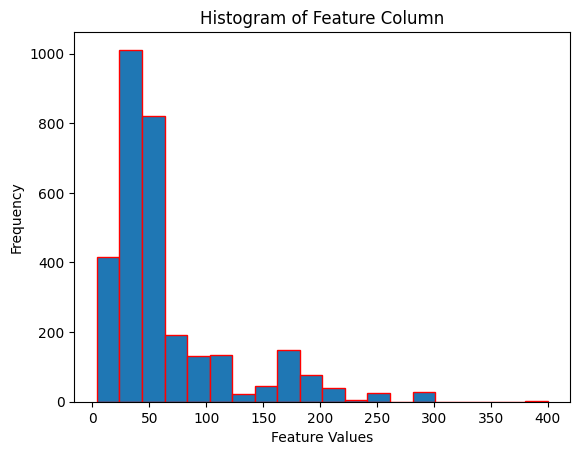

Mean: 64.53408723747981
Variance: 3138.6313905642796


In [ ]:
feature_data = drought_df['score']
# Define the number of bins (buckets) for the histogram
num_bins = 20  # You can adjust this based on your preference
# Plot the histogram
plt.hist(feature_data, bins=num_bins, edgecolor='red')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title('Histogram of Feature Column')
plt.show()
# Calculate the mean and variance of the feature
mean = np.mean(feature_data)
variance = np.var(feature_data)
print(f"Mean: {mean}")
print(f"Variance: {variance}")

In [ ]:
categorical_column_list = ['score','year','month','state']
drought_df_categorical = drought_df[['score','year','month','state']]

<Figure size 1000x4000 with 0 Axes>

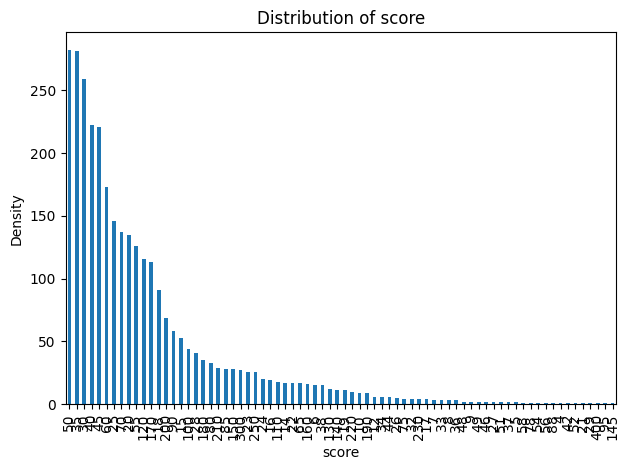

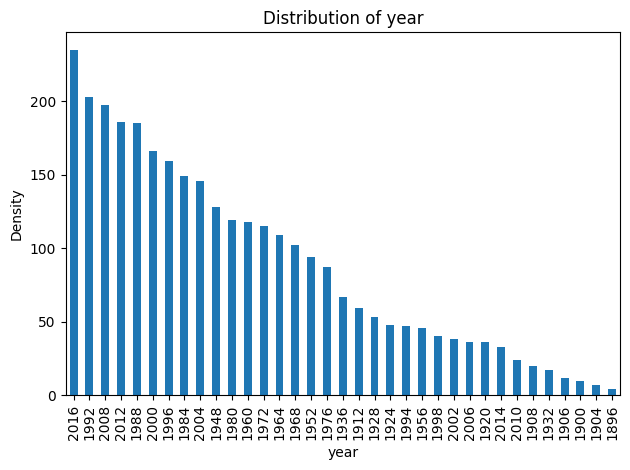

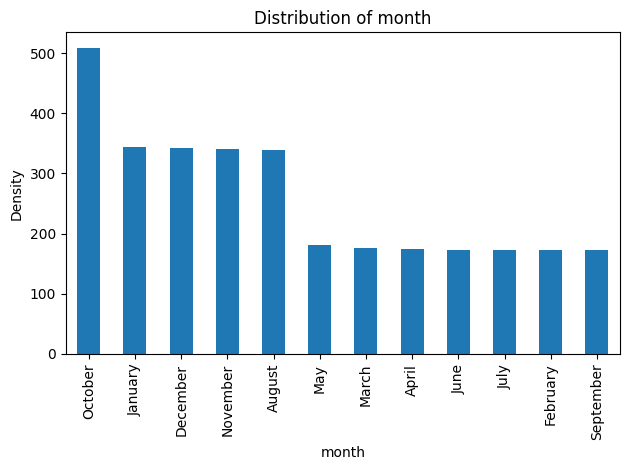

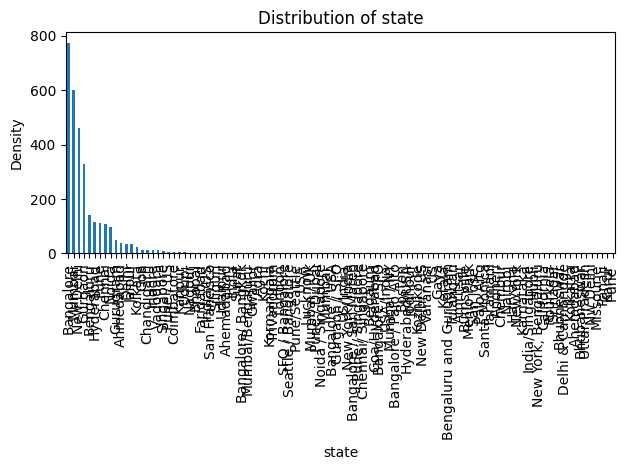

In [ ]:
plt.figure(figsize=(10,40))
for col_name in categorical_column_list:
    plt.figure()
    drought_df_categorical[col_name].value_counts().plot(kind = 'bar')
    x_name = col_name
    y_name = 'Density'
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))
    plt.tight_layout()

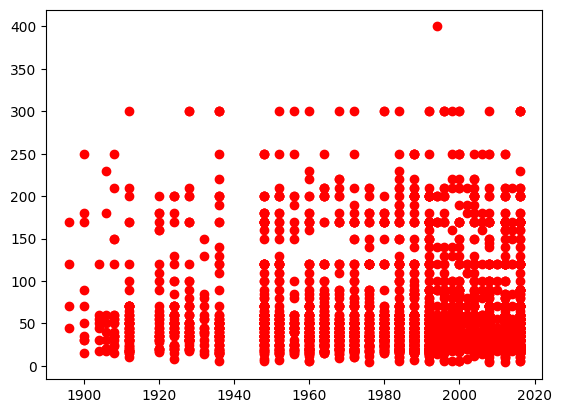

In [ ]:
plt.scatter(drought_df['year'], drought_df['score'], c ="red")
plt.show()

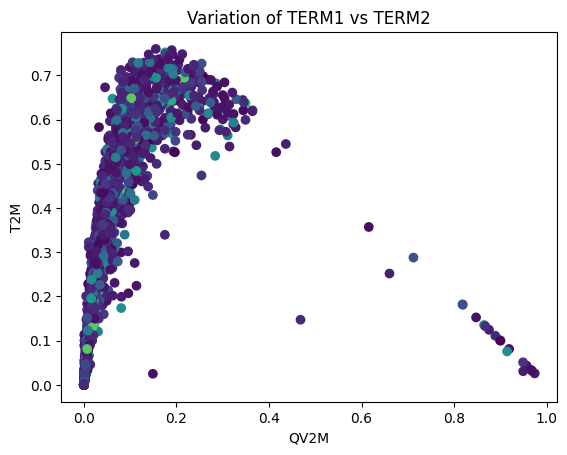

In [ ]:
plt.scatter(drought_df['slope1'], drought_df['slope2'], c =drought_df['score'])
plt.xlabel('QV2M')
plt.ylabel('T2M')
plt.title('Variation of TERM1 vs TERM2')
plt.show()

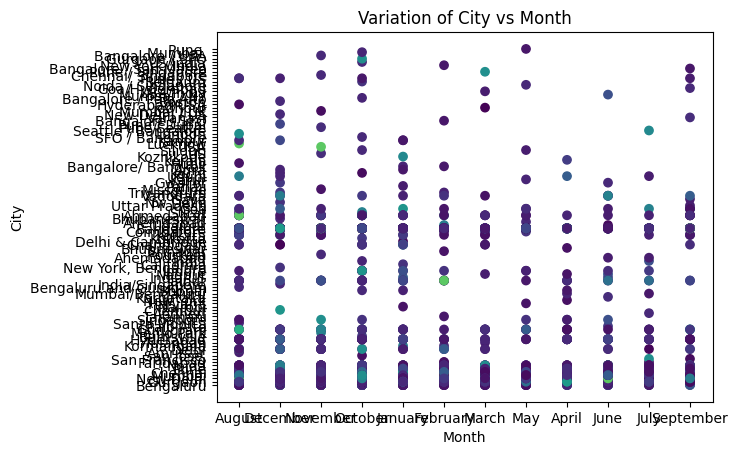

In [ ]:
temp_df = drought_df[drought_df['score']==5]
plt.scatter(drought_df['month'], drought_df['state'], c= drought_df['score'])
plt.xlabel('Month')
plt.ylabel('City')
plt.title('Variation of City vs Month')
plt.show()

In [ ]:
independent_variables = drought_df.drop('score', 1)
independent_variables = independent_variables.drop('fips', 1)
independent_variables = independent_variables.drop('month', 1)
independent_variables = independent_variables.drop('state', 1)
independent_variables.head()

lat        lon  elevation  slope1  slope2  slope3  slope4  slope5  \
0  32.536382 -86.644490         63  0.0419  0.2788  0.2984  0.2497  0.1142   
1  31.870670 -85.405456        146  0.0158  0.1868  0.5441  0.2424  0.0106   
2  30.659218 -87.746067         52  0.0746  0.4370  0.4415  0.0469  0.0000   
3  33.015893 -87.127148         93  0.0144  0.1617  0.3714  0.3493  0.0898   
4  33.977448 -86.567246        198  0.0050  0.0872  0.2799  0.3576  0.1477   

   slope6  slope7  ...  CULTIR_LAND  CULT_LAND  SQ1  SQ2  SQ3  SQ4  SQ5  SQ6  \
0  0.0170  0.0000  ...     1.014811  57.308224    1    1    1    1    1    1   
1  0.0003  0.0000  ...     1.828159  74.406960    3    2    1    1    1    1   
2  0.0000  0.0000  ...     2.996914  62.840553    3    2    1    2    1    1   
3  0.0134  0.0000  ...     0.008330   1.924924    3    2    1    1    1    1   
4  0.1037  0.0189  ...     0.027488   1.919397    3    2    1    1    1    1   

   SQ7  year  
0    2  1992  
1    1  2012  
2    1  1920  
3    1  1900  
4    1  1988  

[5 rows x 32 columns]

In [ ]:
target = drought_df['score']
target.head()

0    35
1    26
2    20
3    15
4    28
Name: score, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have defined your independent variables (features) and target variable
# independent_variables = df.drop(columns=['score'])
# target = df['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

# Now you can access X_train, y_train, X_test, and y_test

In [ ]:
print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

Train features shape (2476, 32)
Train target shape (2476,)
Test features shape (619, 32)
Test target shape (619,)


Mean Squared Error: 0.00033650453933602555
R-squared: 0.9715702273387767


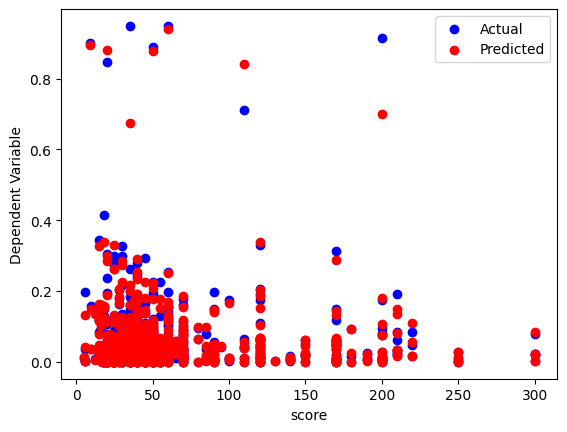

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the regressor on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Assuming X_test contains a single feature column
feature_name = 'score'  # Replace with the actual feature name
X_feature_test = X_test['score']

# Visualize the regression results
plt.scatter(X_feature_test, y_test, color='blue', label='Actual')
plt.scatter(X_feature_test, y_pred, color='red', label='Predicted')
plt.xlabel(feature_name)
plt.ylabel('Dependent Variable')
plt.legend()
plt.show()

In [ ]:
model = RandomForestClassifier(n_estimators=10) # n_estimators is the hyperparameter
rfe = RFE(model, n_features_to_select=15) # n_features_to_select is chosen on a trial and error basis
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
selected_features = independent_variables.columns[(fit.get_support())]
print(selected_features)

Num Features: 15
Selected Features: [ True  True  True False  True  True  True False False False False  True
  True  True  True False False False  True False  True False  True  True
 False False False False False False False  True]
Feature Ranking: [ 1  1  1  3  1  1  1  4  7  8 12  1  1  1  1  5 10 15  1  2  1  6  1  1
  9 11 16 14 17 18 13  1]
Index(['lat', 'lon', 'elevation', 'slope2', 'slope3', 'slope4', 'aspectN',
       'aspectE', 'aspectS', 'aspectW', 'URB_LAND', 'FOR_LAND', 'CULTIR_LAND',
       'CULT_LAND', 'year'],
      dtype='object')


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.99788745,  1.51530072, -0.33566828, ..., -0.14260281,
        -0.27956221, -0.05696242],
       [ 0.6228224 ,  0.96518529, -0.20368882, ..., -0.14260281,
        -0.27956221, -1.18414681],
       [ 0.34568262,  1.4003125 , -0.62362348, ..., -0.14260281,
        -0.27956221, -0.05696242],
       ...,
       [ 0.45692977, -0.68728447,  0.60618515, ..., -0.14260281,
        -0.27956221, -0.33875852],
       [-1.95168938, -0.51703677, -0.69361258, ..., -0.14260281,
        -0.27956221,  1.07022198],
       [-1.96060912, -0.68171323, -0.46964744, ..., -0.14260281,
         1.72100437,  0.08393563]])

In [ ]:
model = RandomForestClassifier(n_estimators=10) # n_estimators is the hyperparameter
rfe = RFE(model, n_features_to_select=15) # n_features_to_select is chosen on a trial and error basis
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
selected_features = independent_variables.columns[(fit.get_support())]
print(selected_features)

Num Features: 15
Selected Features: [ True  True  True  True False  True  True False False False False  True
  True  True  True False False False  True  True False False  True  True
 False False False False False False False  True]
Feature Ranking: [ 1  1  1  1  4  1  1  3  7  8 15  1  1  1  1  5 14 12  1  1  2  6  1  1
  9 10 16 11 17 18 13  1]
Index(['lat', 'lon', 'elevation', 'slope1', 'slope3', 'slope4', 'aspectN',
       'aspectE', 'aspectS', 'aspectW', 'URB_LAND', 'GRS_LAND', 'CULTIR_LAND',
       'CULT_LAND', 'year'],
      dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Train features shape (2476, 32)
Train target shape (2476,)
Test features shape (619, 32)
Test target shape (619,)


In [ ]:
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
X_train_dres, y_train_dres = undersample.fit_resample(X_train, y_train)

In [ ]:
print('Before UnderSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(X_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres == 5)))

Before UnderSampling, the shape of train_X: (2476, 32)
Before UnderSampling, the shape of train_y: (2476,) 

After UnderSampling, the shape of train_X: (158, 32)
After UnderSampling, the shape of train_y: (158,) 

Counts of label '0' - Before UnderSampling:0, After UnderSampling: 0
Counts of label '1' - Before UnderSampling:0, After UnderSampling: 0
Counts of label '2' - Before UnderSampling:0, After UnderSampling: 0
Counts of label '3' - Before UnderSampling:0, After UnderSampling: 0
Counts of label '4' - Before UnderSampling:1, After UnderSampling: 1
Counts of label '5' - Before UnderSampling:2, After UnderSampling: 0


In [ ]:
undersample = NeighbourhoodCleaningRule(n_neighbors=1, threshold_cleaning=0.5)
X_train_dres, y_train_dres = undersample.fit_resample(X_train, y_train)

In [ ]:
undersample = NearMiss(n_neighbors=1)
X_train_dres_nm, y_train_dres_nm = undersample.fit_resample(X_train, y_train)

In [ ]:
print('Before UnderSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(X_train_dres_nm.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres_nm.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres_nm == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres_nm == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres_nm == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres_nm == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres_nm == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres_nm == 5)))

Before UnderSampling, the shape of train_X: (2476, 32)
Before UnderSampling, the shape of train_y: (2476,) 

After UnderSampling, the shape of train_X: (74, 32)
After UnderSampling, the shape of train_y: (74,) 

Counts of label '0' - Before UnderSampling:0, After UnderSampling: 0
Counts of label '1' - Before UnderSampling:0, After UnderSampling: 0
Counts of label '2' - Before UnderSampling:0, After UnderSampling: 0
Counts of label '3' - Before UnderSampling:0, After UnderSampling: 0
Counts of label '4' - Before UnderSampling:1, After UnderSampling: 1
Counts of label '5' - Before UnderSampling:2, After UnderSampling: 1


In [ ]:
pca = PCA()
X_train_dres_nm_PCAreduced = pca.fit_transform(X_train_dres_nm)
X_test_NM_PCA_transformed = pca.transform(X_test)

In [ ]:
print(pca.explained_variance_ratio_)

[3.45381003e-01 2.00833998e-01 1.37876854e-01 7.06069659e-02
 4.53665051e-02 3.84660260e-02 2.87251638e-02 2.74042172e-02
 2.24052292e-02 1.75216355e-02 1.65769979e-02 1.52717564e-02
 9.64906048e-03 6.15540036e-03 5.54426381e-03 4.16876308e-03
 3.17026931e-03 2.06026063e-03 1.41762639e-03 8.10431365e-04
 4.09723139e-04 1.13472167e-04 6.38867992e-05 4.90480379e-07
 1.57826703e-17 4.09370042e-18 6.81143927e-32 2.04535225e-33
 1.53982100e-33 1.53982100e-33 1.53982100e-33 7.76049797e-34]


In [ ]:
# choosing n value that explains >90% variance
pca = PCA(n_components=5)
X_train_dres_nm_PCAreduced = pca.fit_transform(X_train_dres_nm)
X_test_NM_PCA_transformed = pca.transform(X_test)

In [ ]:
print(pca.explained_variance_ratio_)

[0.345381   0.200834   0.13787685 0.07060697 0.04536651]


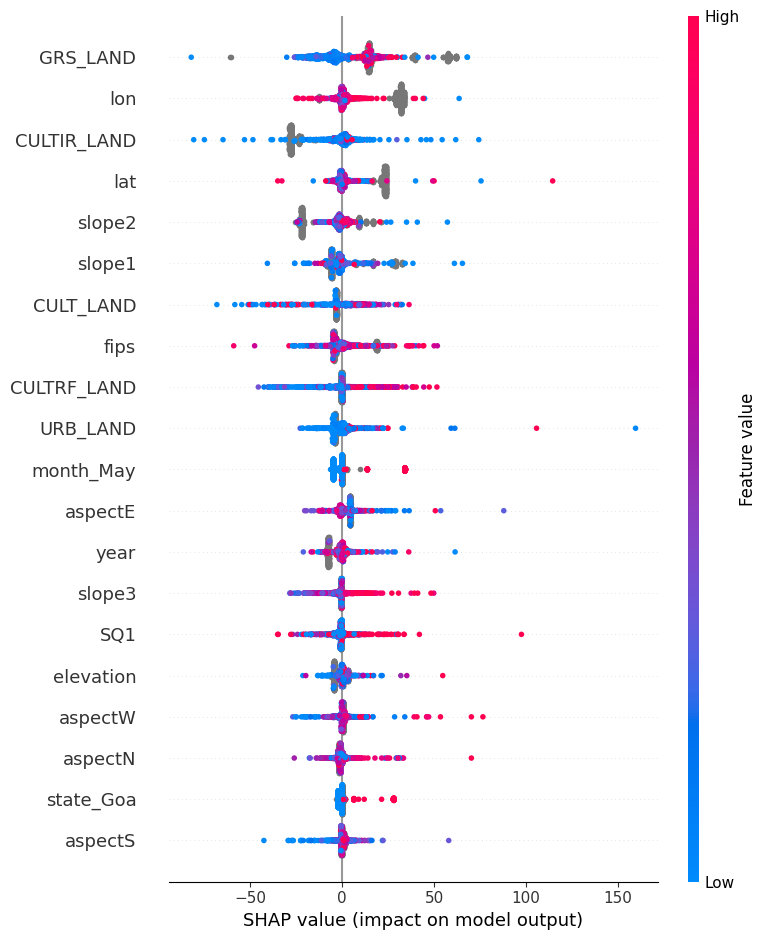

In [ ]:
#SUMMARY PLOT
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import shap
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('soil_data (1).csv')

# Define features (independent variables) and target (dependent variable)
X = df.drop(columns=['score'])
y = df['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Identify numeric columns for imputation
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns for one-hot encoding
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Impute missing values for numeric columns using the mean
imputer = SimpleImputer(strategy='mean')
X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Create feature names for one-hot encoded columns
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Combine encoded categorical columns with numeric columns
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names)

X_train = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded_df], axis=1)
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align target variable

# Train a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
# Train a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.Explainer(regressor, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, feature_names=list(X.columns) + list(encoded_feature_names))
plt.show()


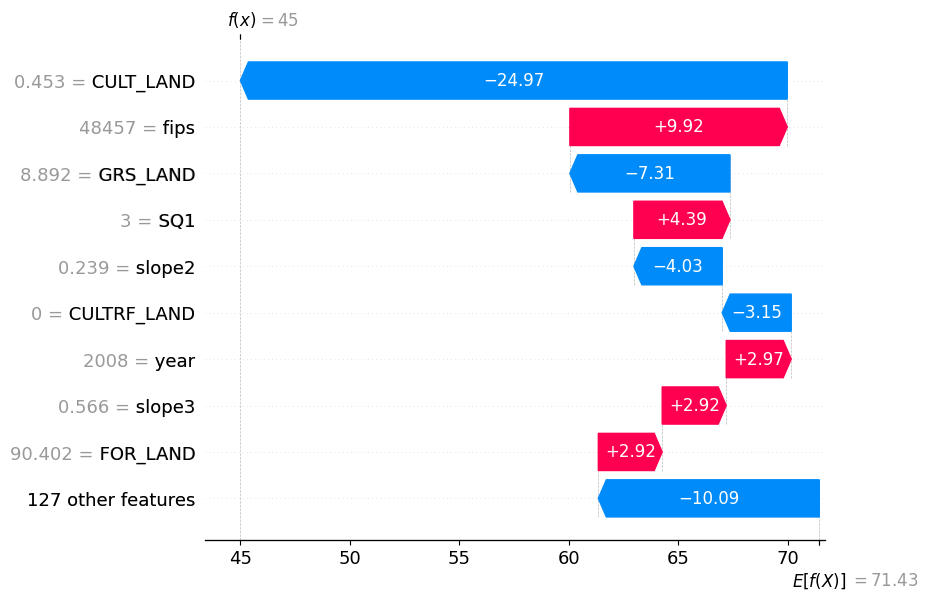

In [ ]:
#WATERFALL PLOT
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import shap
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('soil_data (1).csv')

# Define features (independent variables) and target (dependent variable)
X = df.drop(columns=['score'])
y = df['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Identify numeric columns for imputation
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns for one-hot encoding
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Impute missing values for numeric columns using the mean
imputer = SimpleImputer(strategy='mean')
X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Create feature names for one-hot encoded columns
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Combine encoded categorical columns with numeric columns
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names)

X_train = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded_df], axis=1)
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align target variable

# Train a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.Explainer(regressor, X_train)
shap_values = explainer(X_test)  # Use explainer to compute SHAP values

# Create a Waterfall Plot for a specific prediction (change the index as needed)
shap.plots.waterfall(shap_values[0])  # Change the index to visualize different predictions
plt.show()


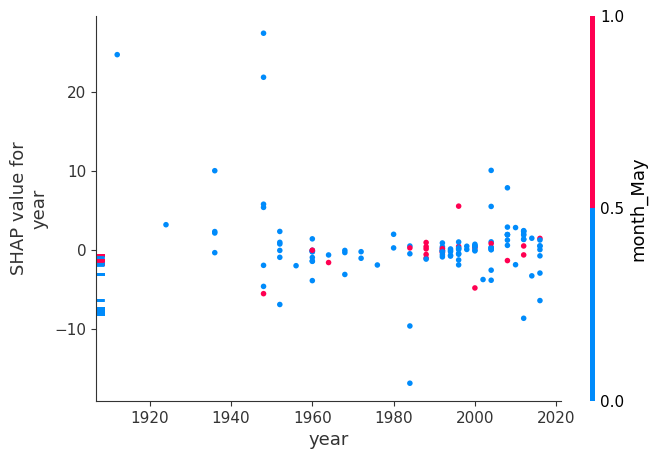

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import shap
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('soil_data (1).csv')

# Define features (independent variables) and target (dependent variable)
X = df.drop(columns=['score'])
y = df['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Identify numeric columns for imputation
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns for one-hot encoding
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Impute missing values for numeric columns using the mean
imputer = SimpleImputer(strategy='mean')
X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Create feature names for one-hot encoded columns
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Combine encoded categorical columns with numeric columns
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names)

X_train = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded_df], axis=1)
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align target variable

# Train a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.Explainer(regressor, X_train)
shap_values = explainer.shap_values(X_test)

# Create a Dependency Plot for a specific feature (change the feature name as needed)
shap.dependence_plot("year", shap_values, X_test, feature_names=list(X.columns) + list(encoded_feature_names))
plt.show()


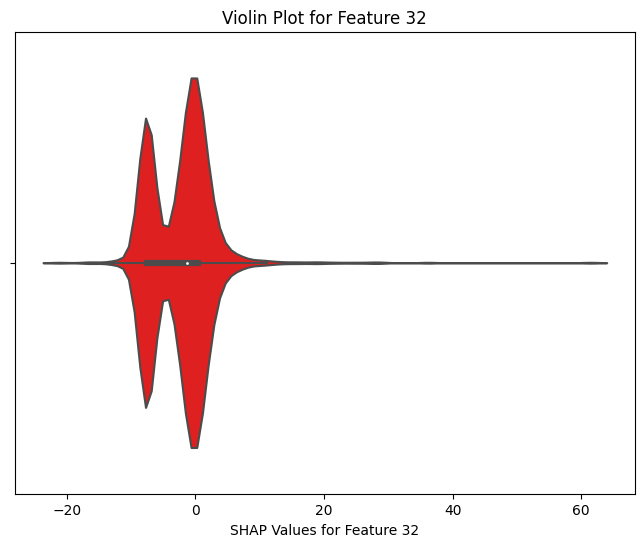

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('soil_data (1).csv')

# Define features (independent variables) and target (dependent variable)
X = df.drop(columns=['score'])
y = df['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Identify numeric columns for imputation
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns for one-hot encoding
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Impute missing values for numeric columns using the mean
imputer = SimpleImputer(strategy='mean')
X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Create feature names for one-hot encoded columns
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Combine encoded categorical columns with numeric columns
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names)

X_train = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded_df], axis=1)
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align target variable

# Train a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.Explainer(regressor, X_train)
shap_values = explainer.shap_values(X_test)

# Specify the feature for which you want to create a violin plot
feature_index = 32 # Change this to the index of the feature you want to visualize

# Create a Violin Plot for the specified feature using seaborn
plt.figure(figsize=(8, 6))
sns.violinplot(x=shap_values[:, feature_index],color='red',plot_type="layered_violin")
plt.title(f'Violin Plot for Feature {feature_index}')
plt.xlabel(f'SHAP Values for Feature {feature_index}')
plt.show()


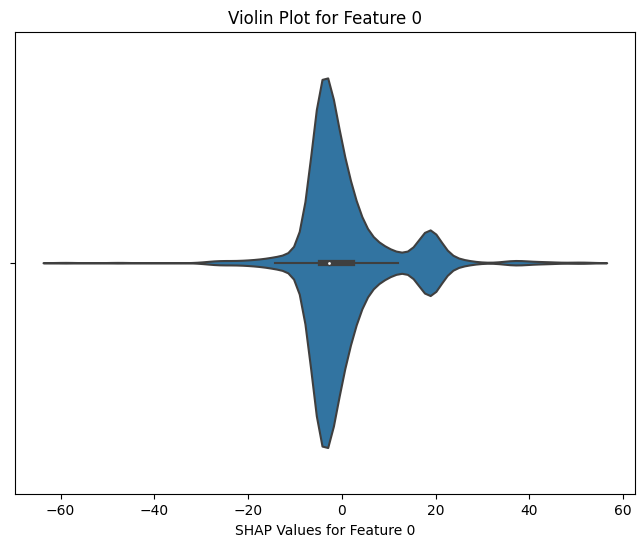

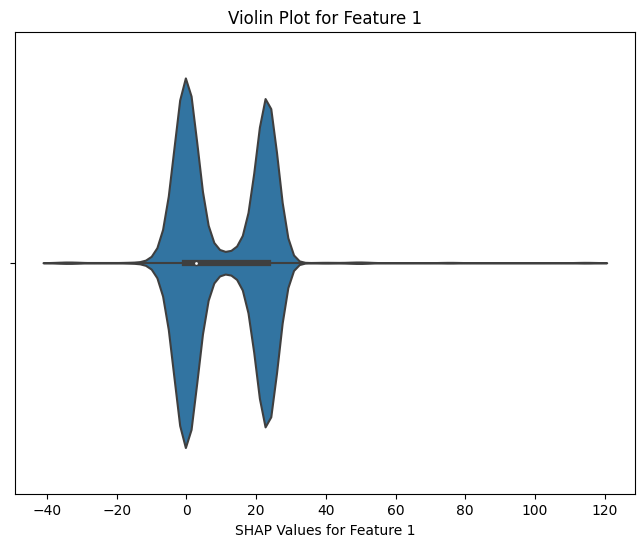

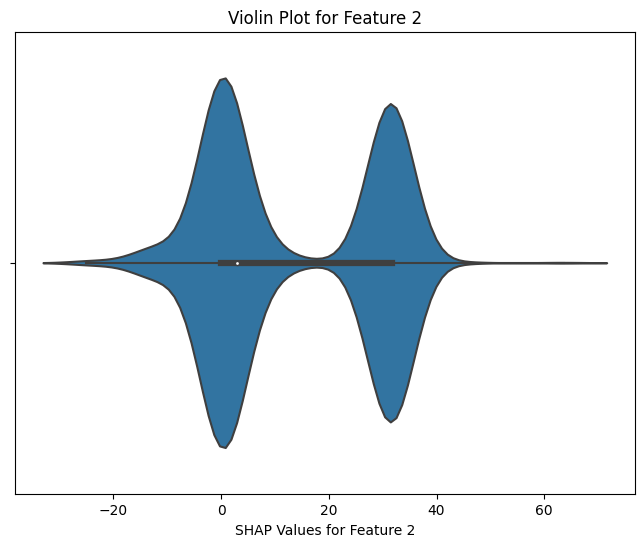

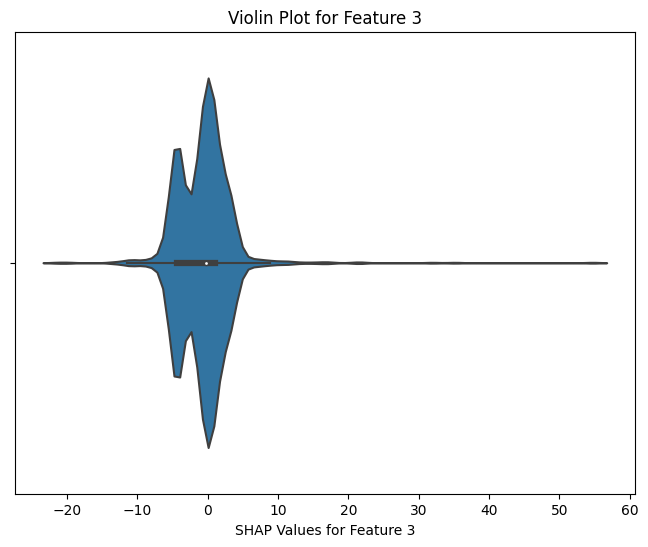

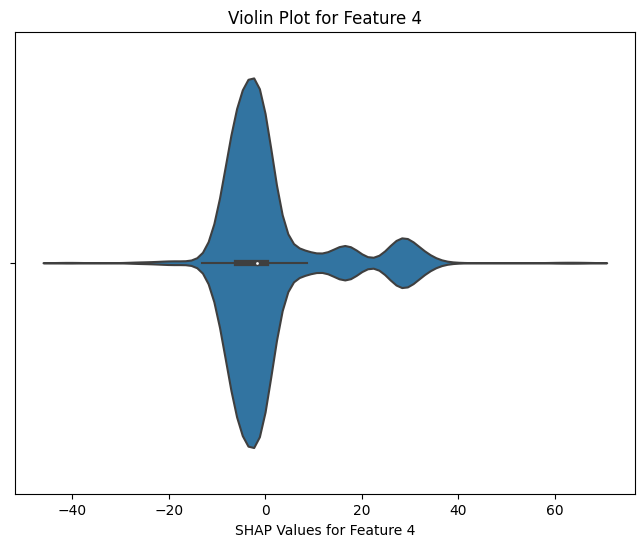

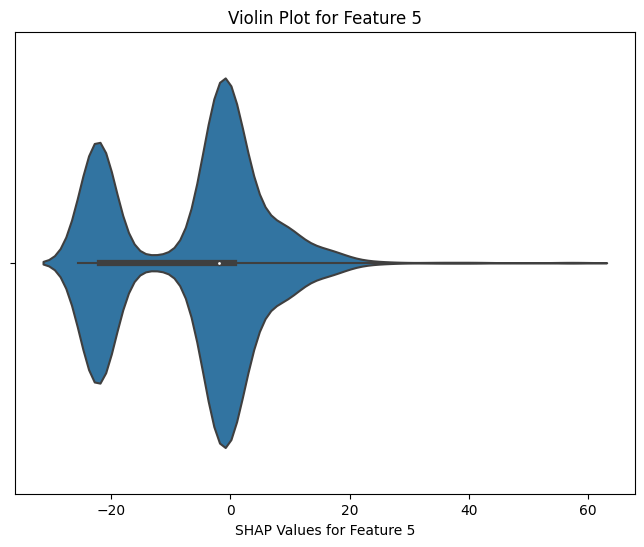

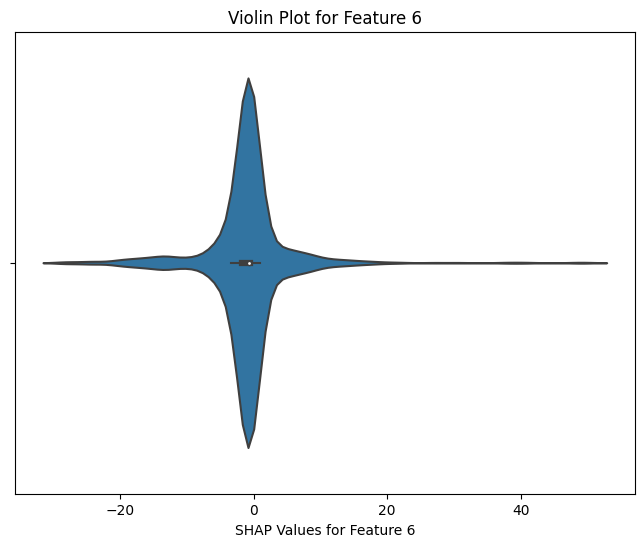

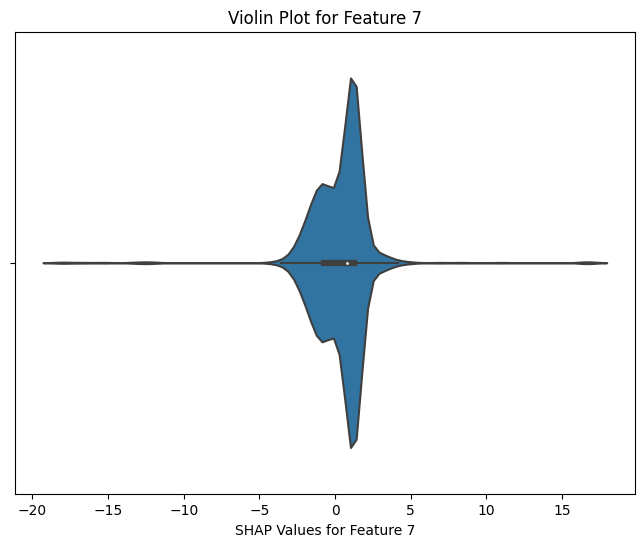

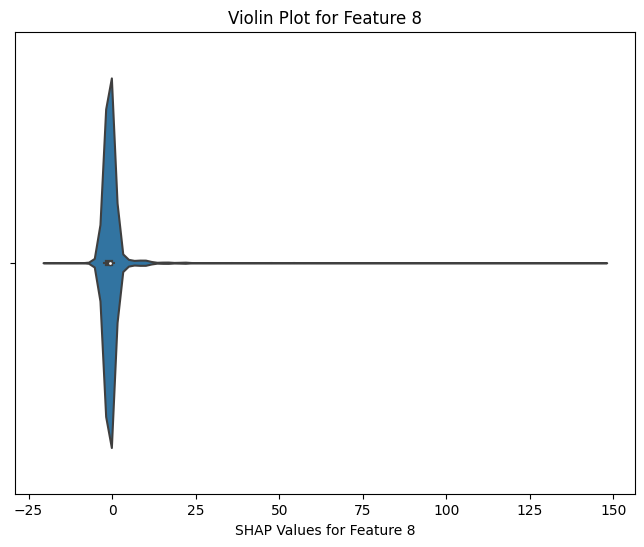

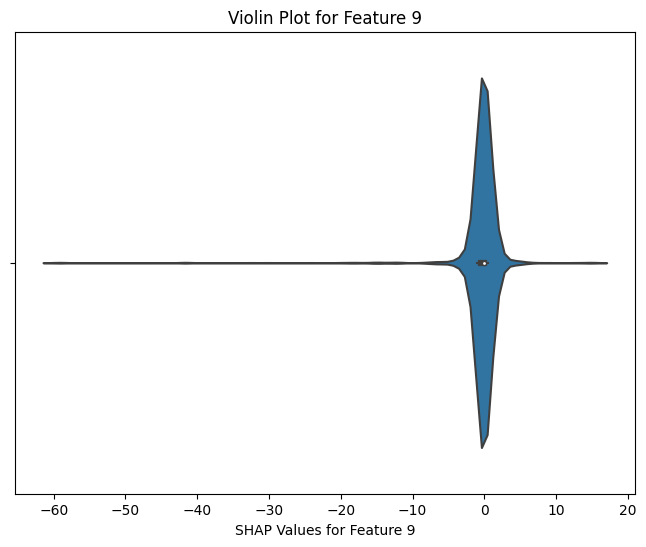

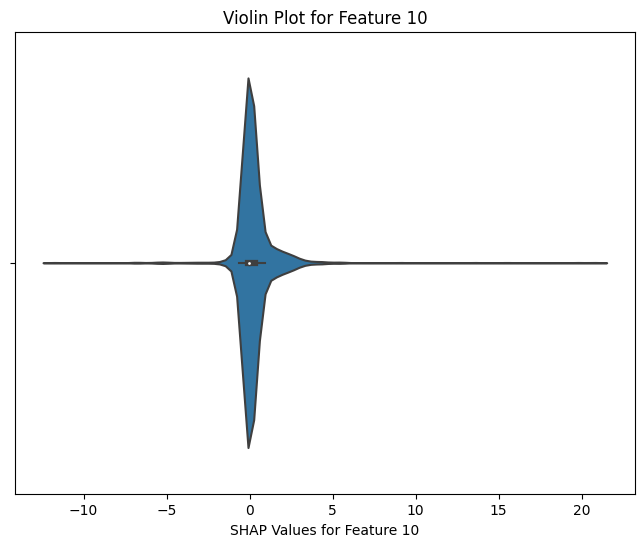

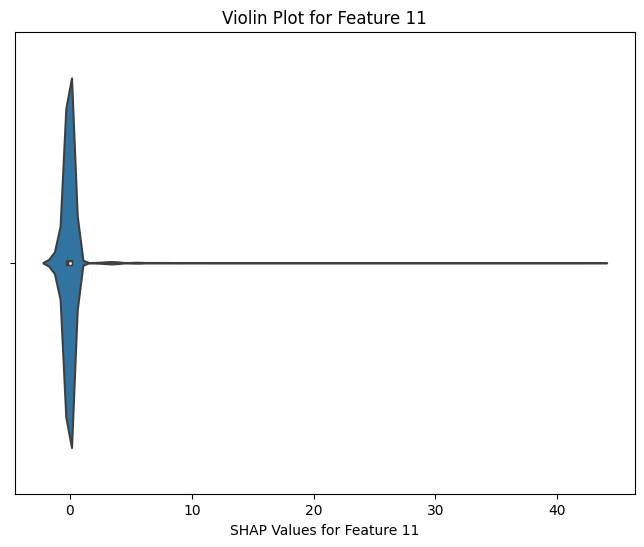

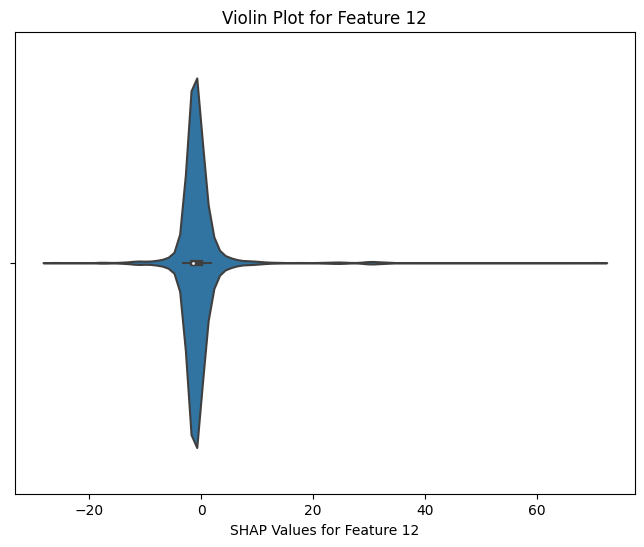

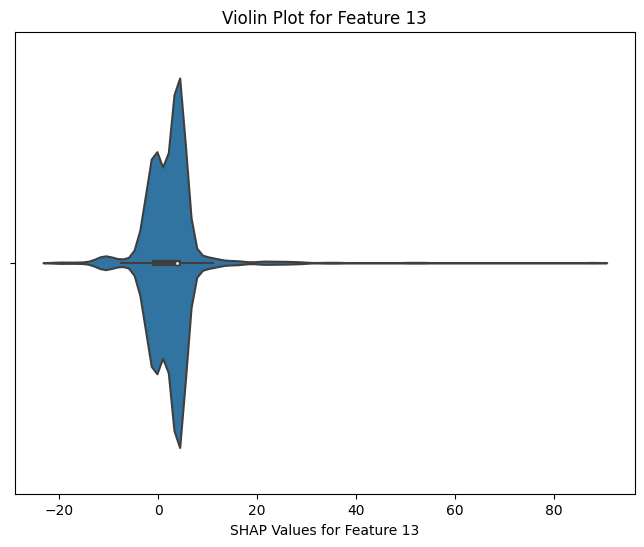

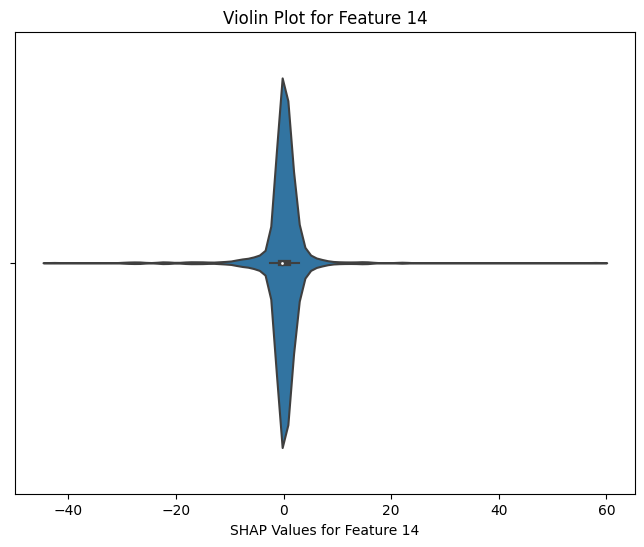

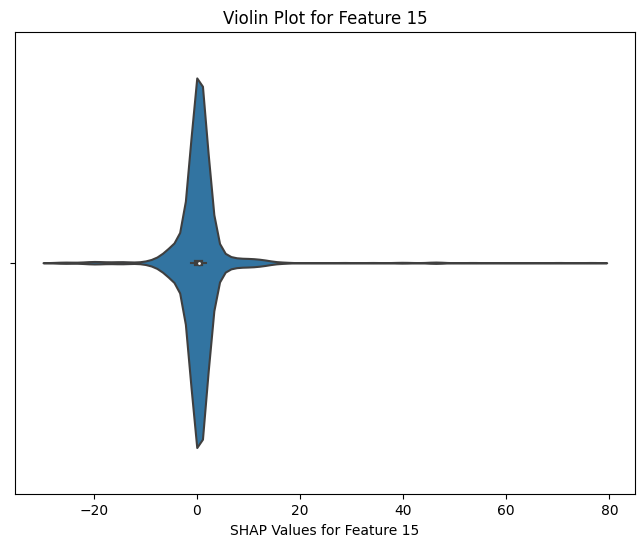

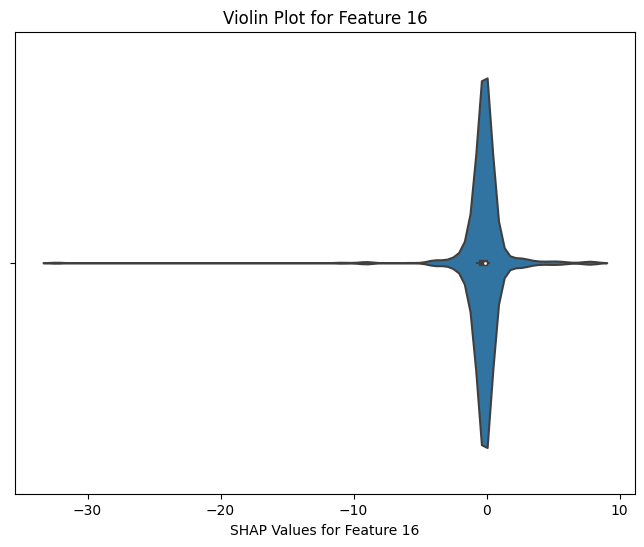

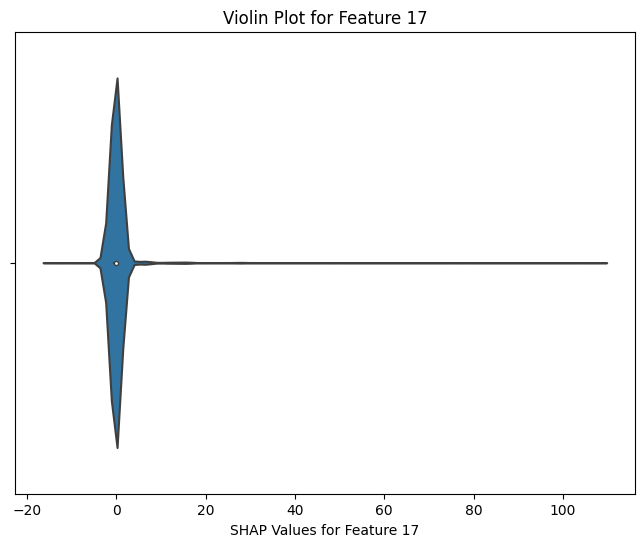

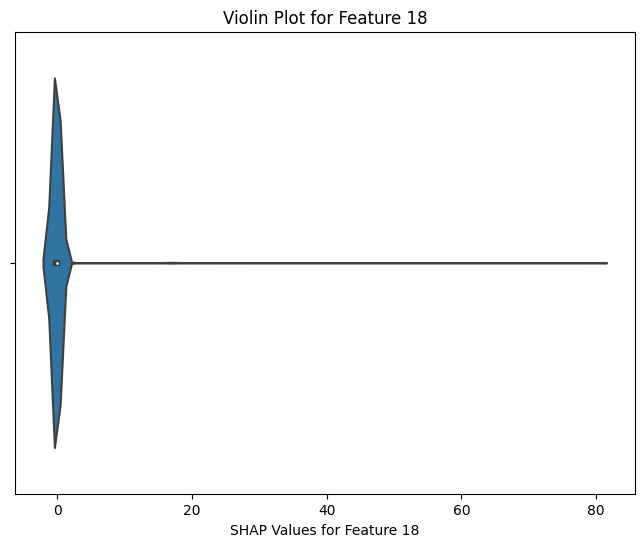

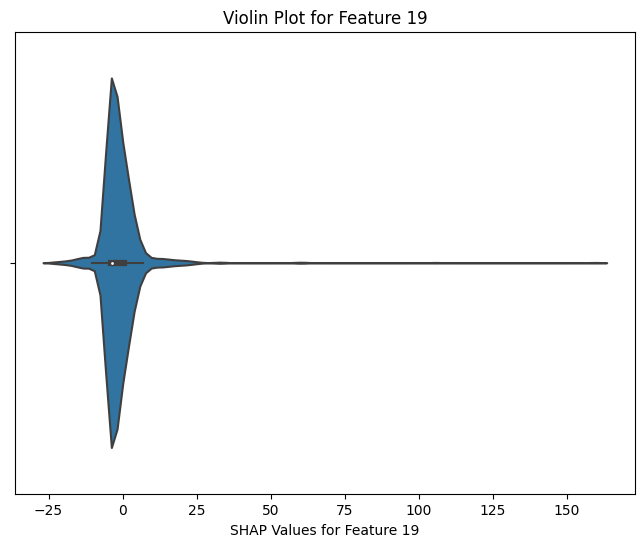

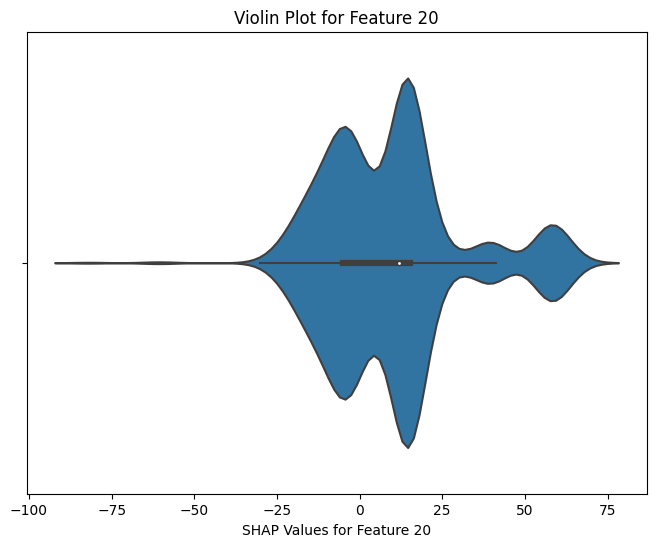

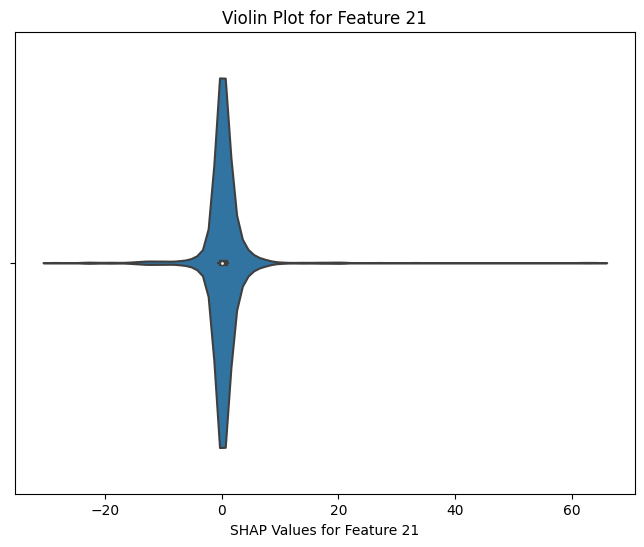

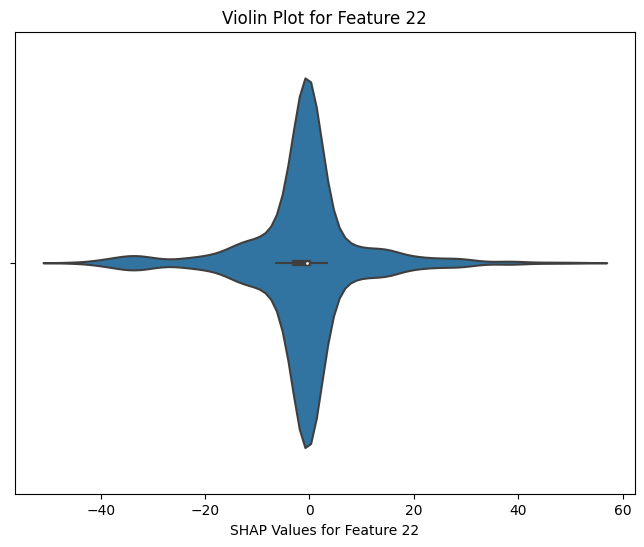

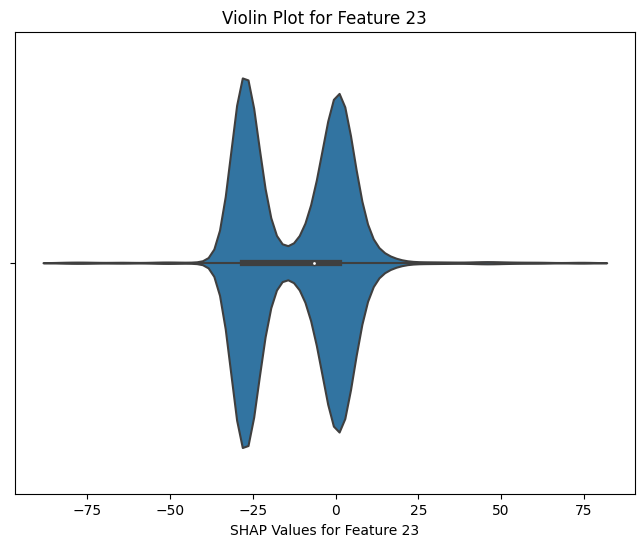

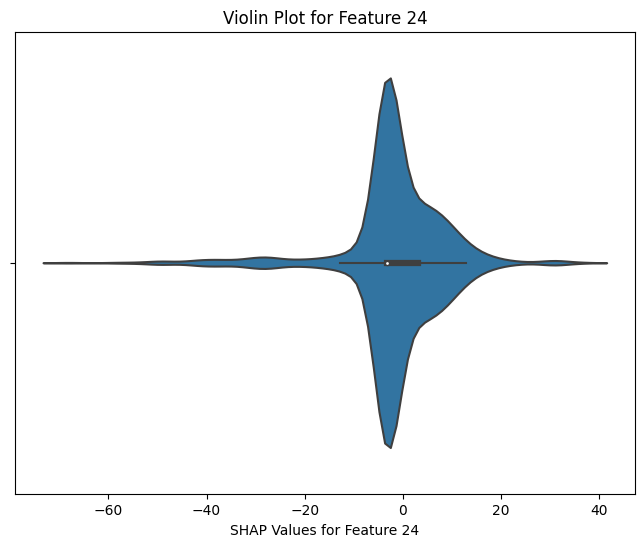

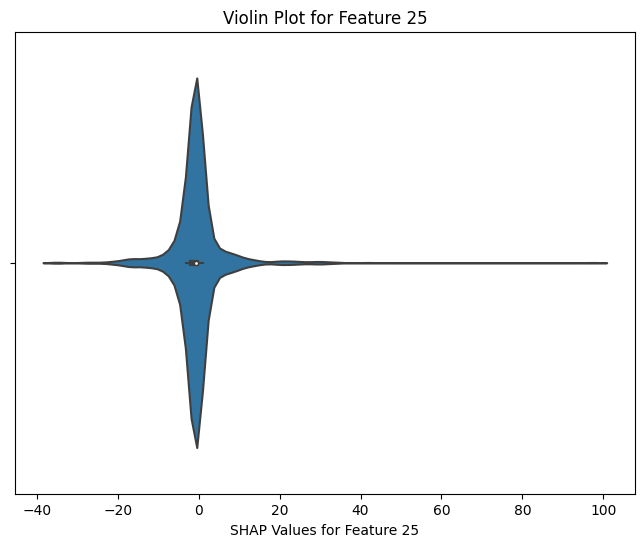

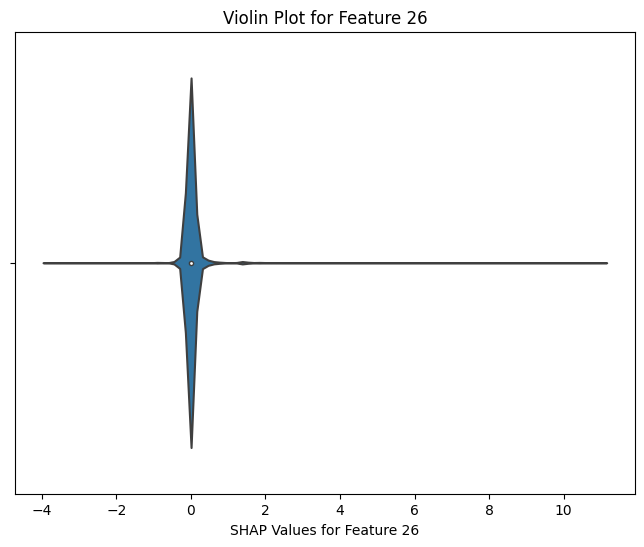

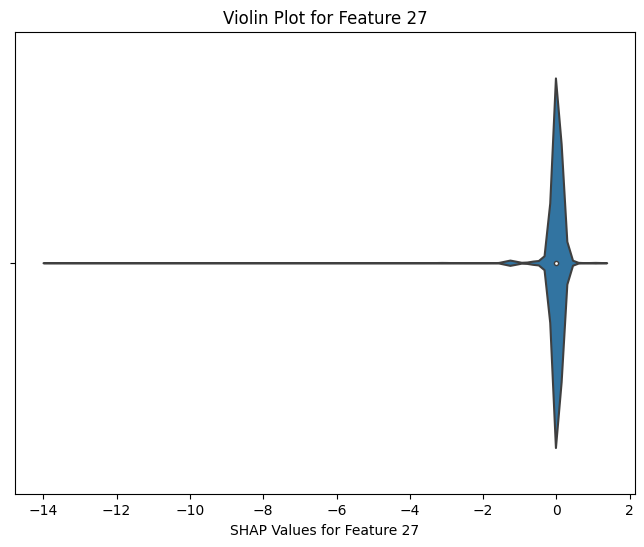

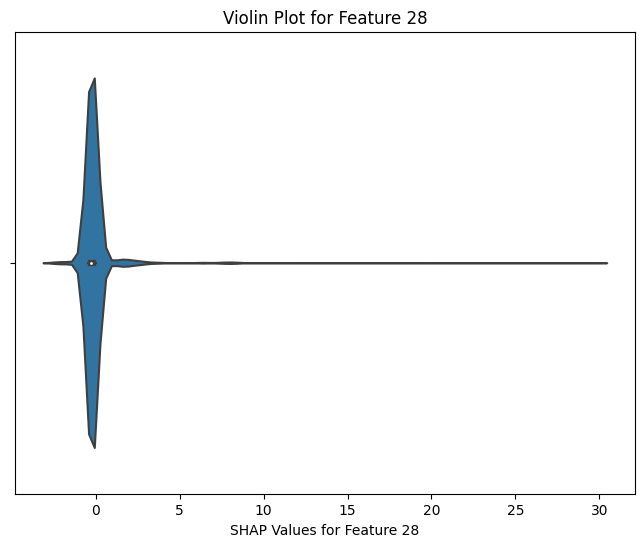

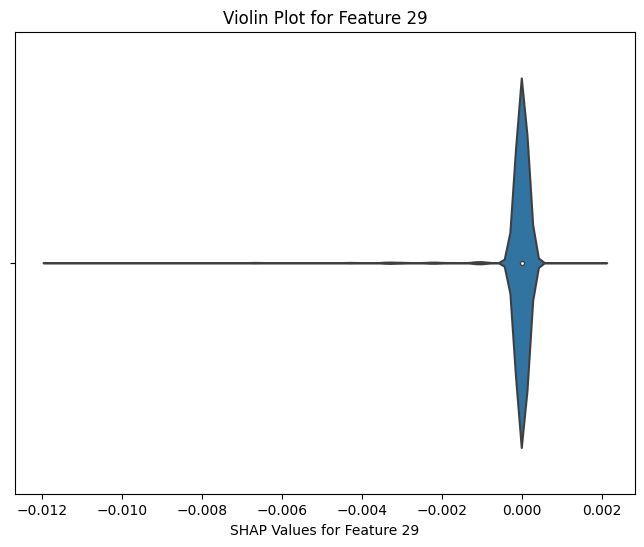

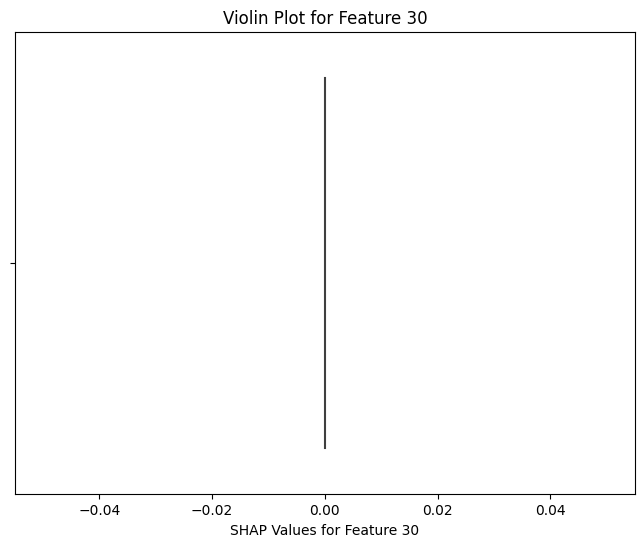

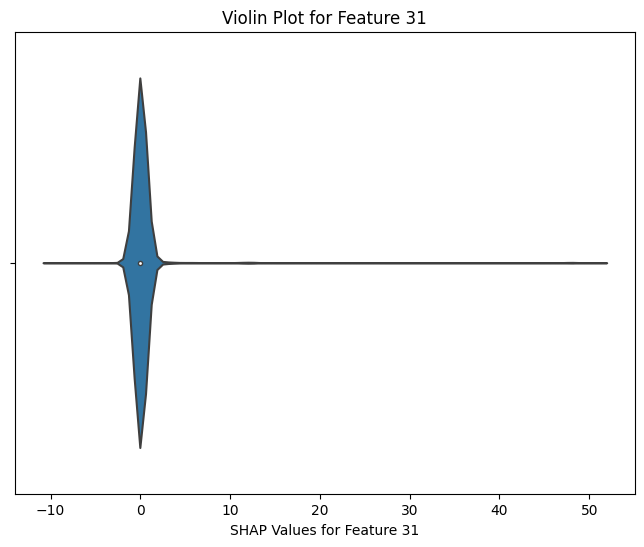

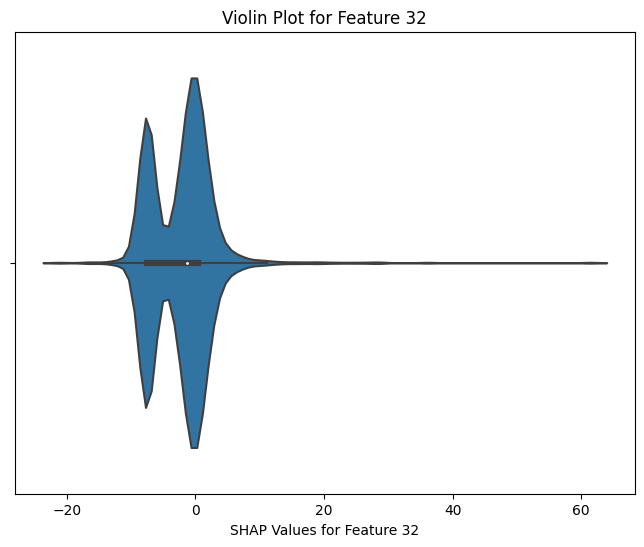

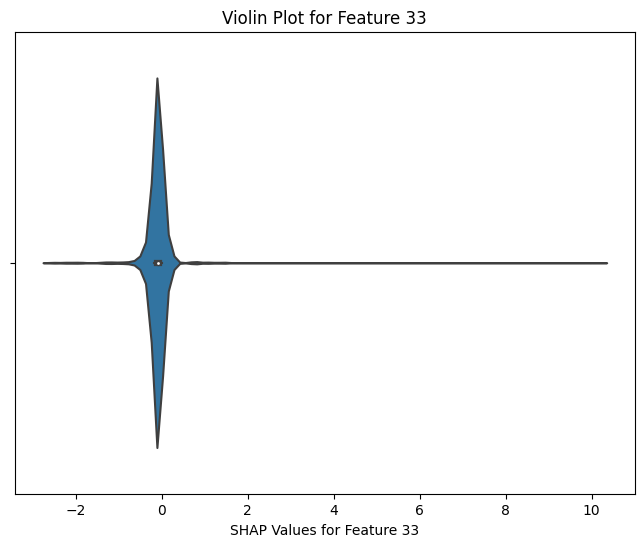

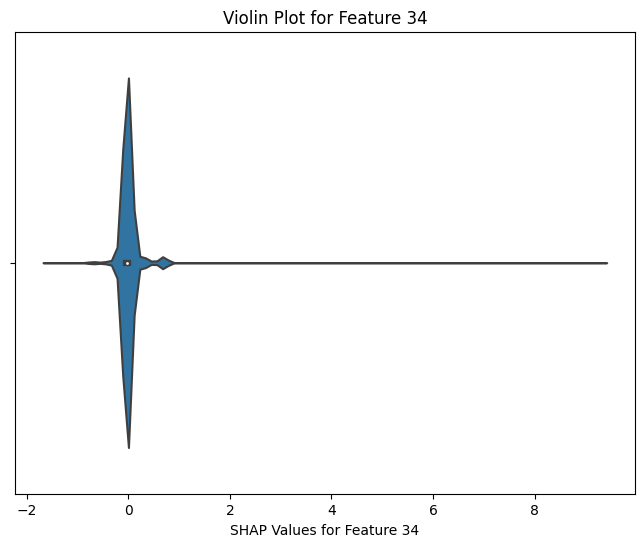

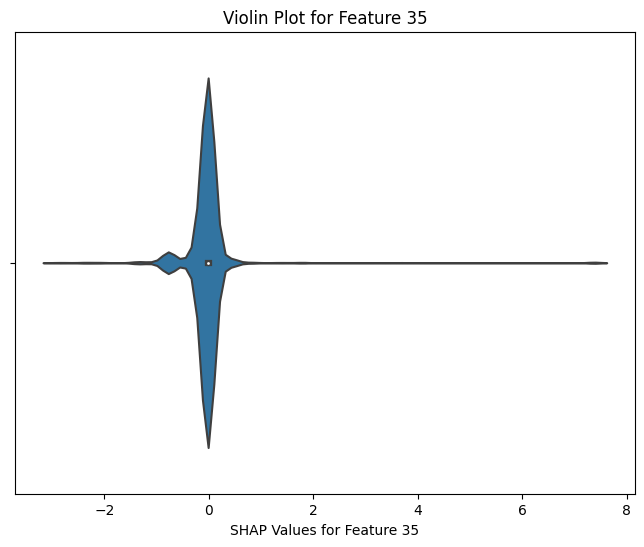

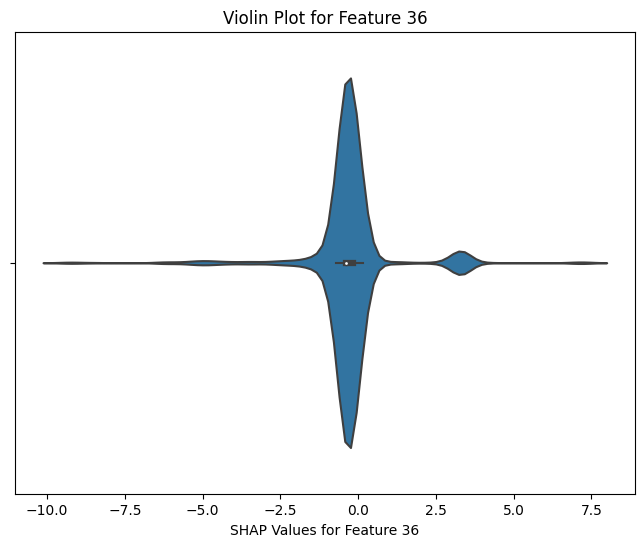

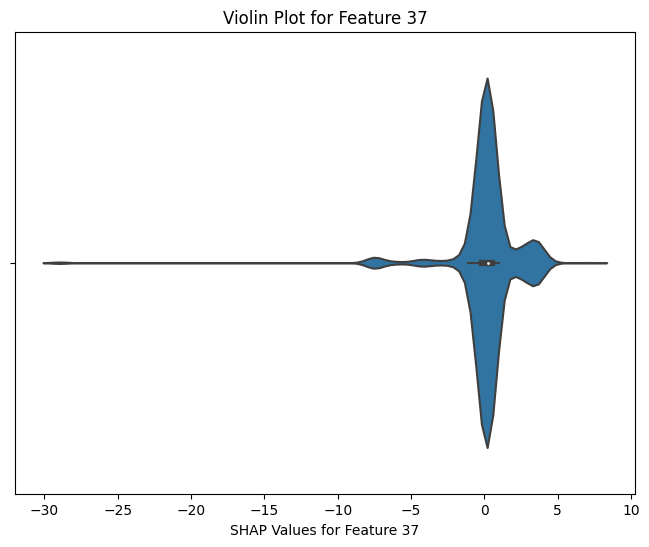

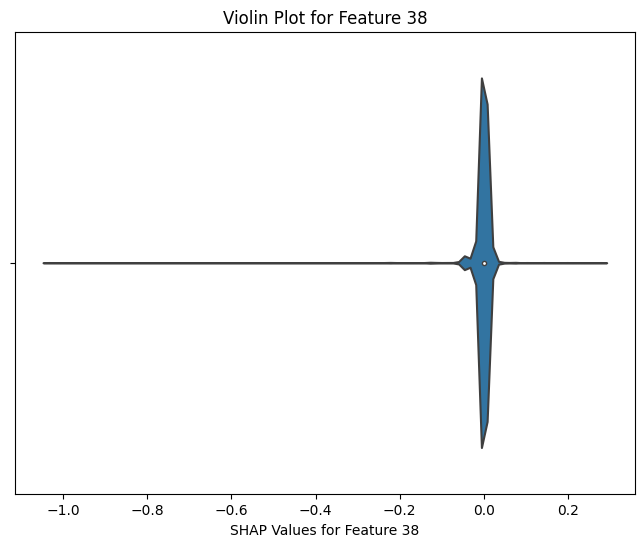

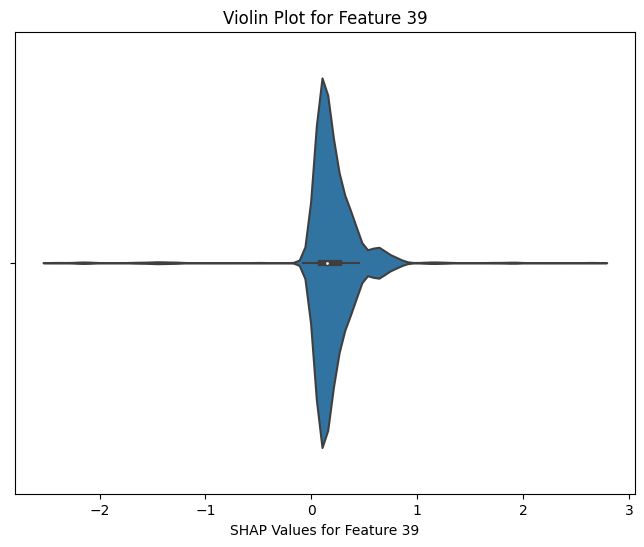

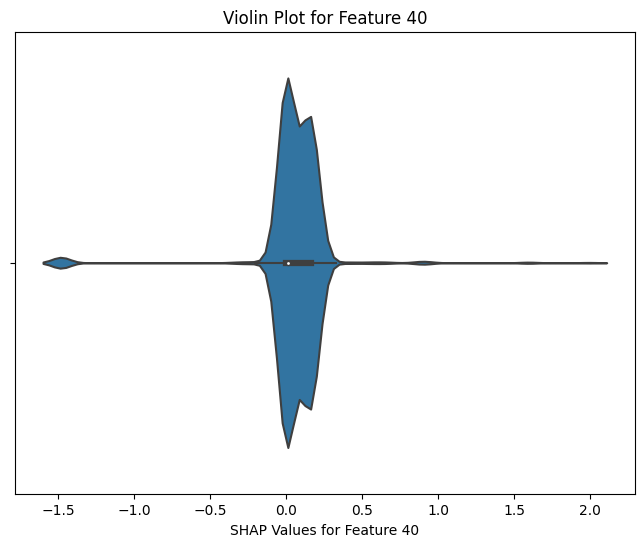

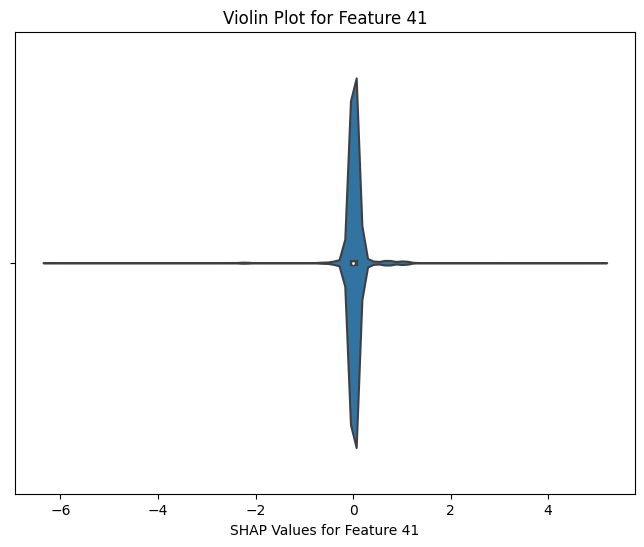

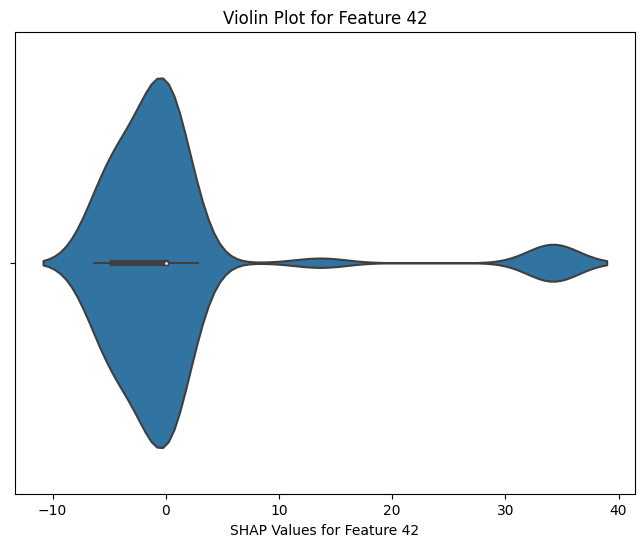

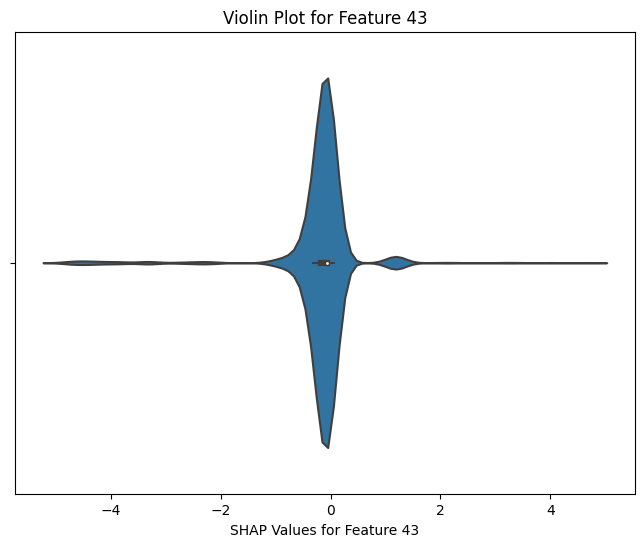

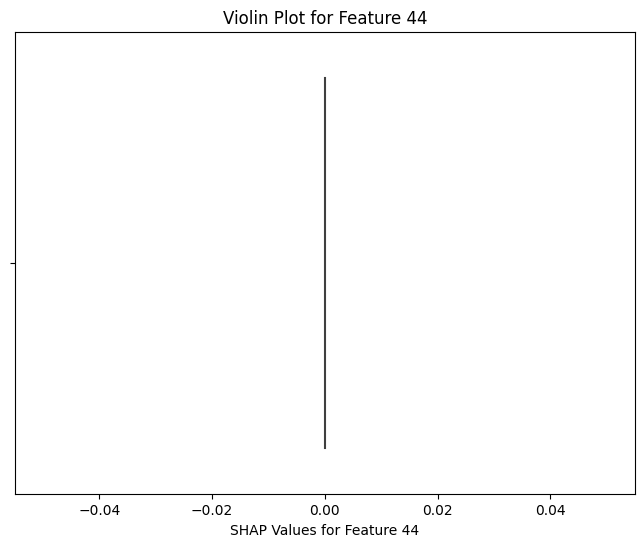

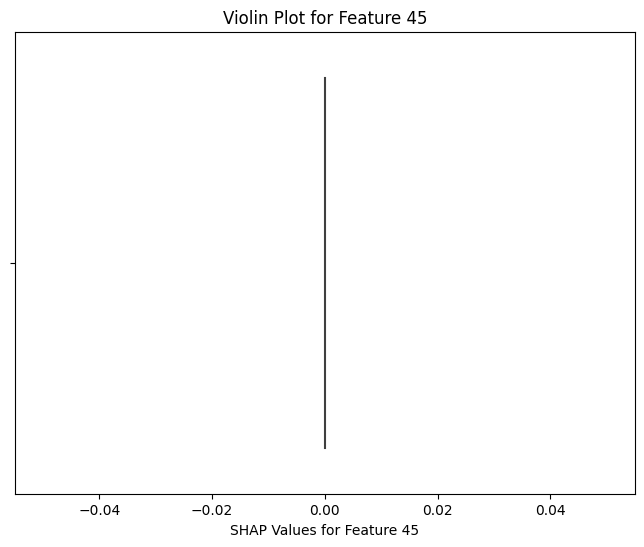

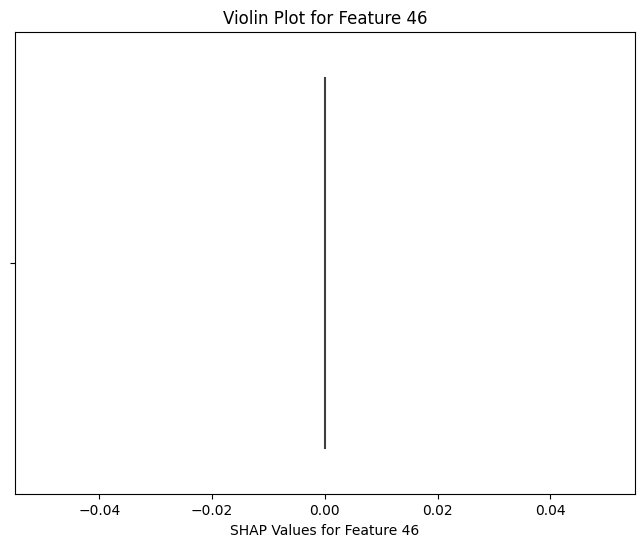

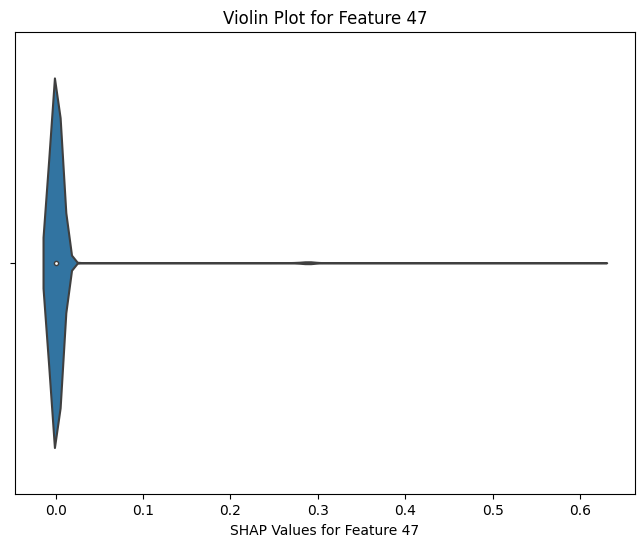

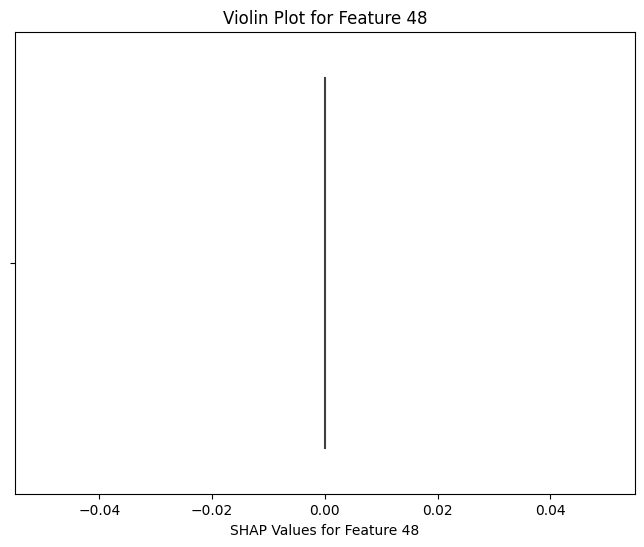

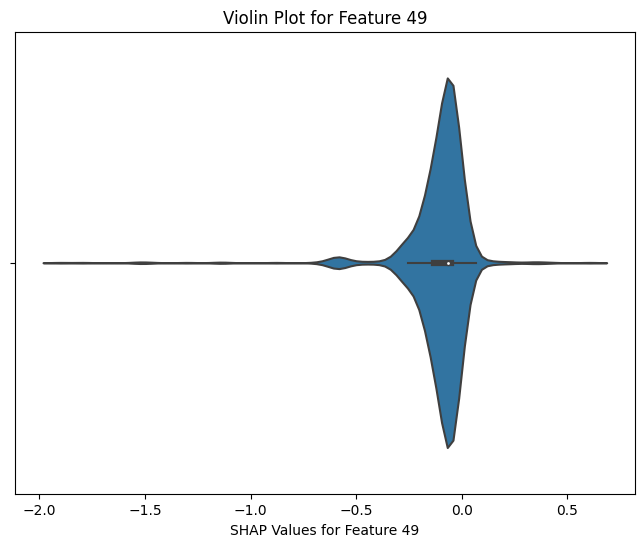

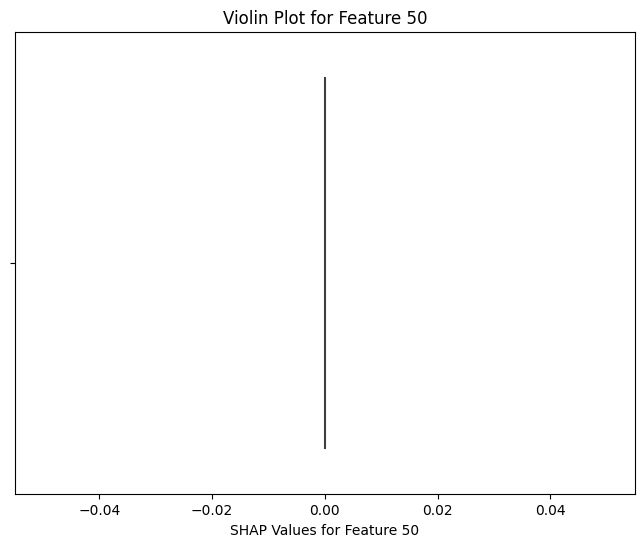

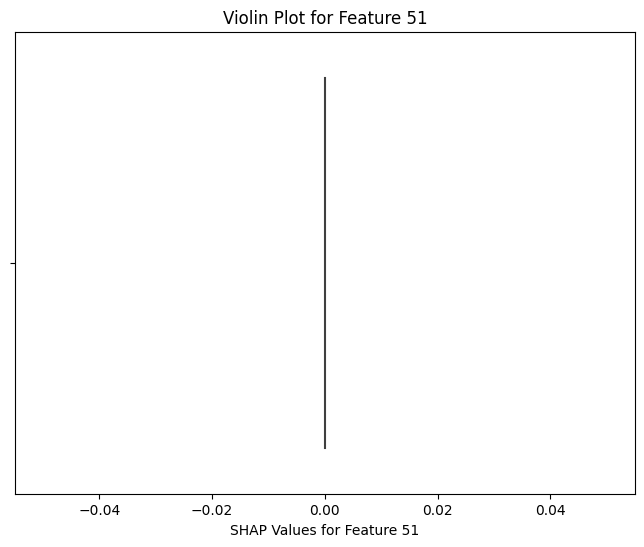

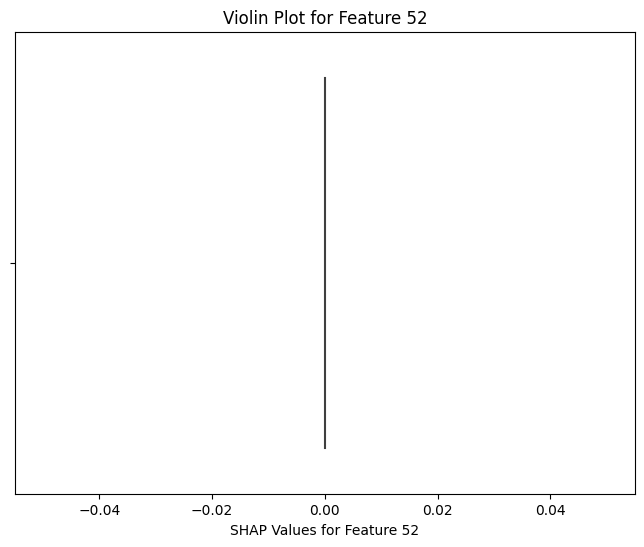

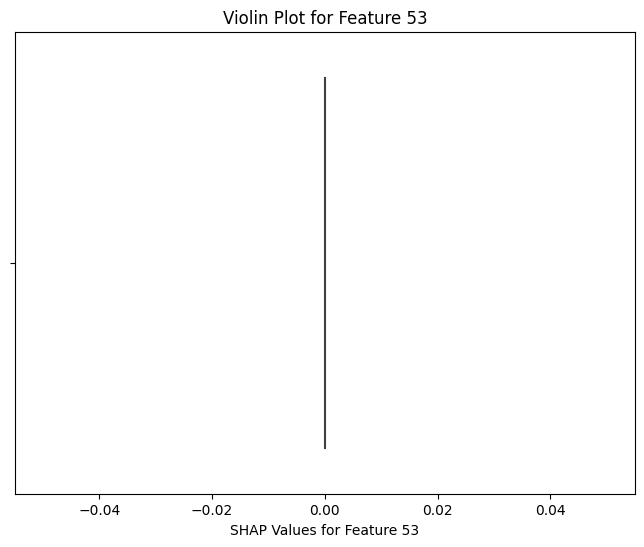

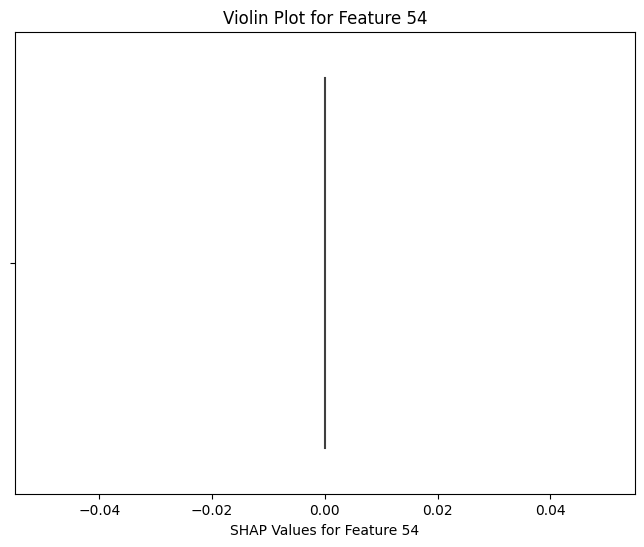

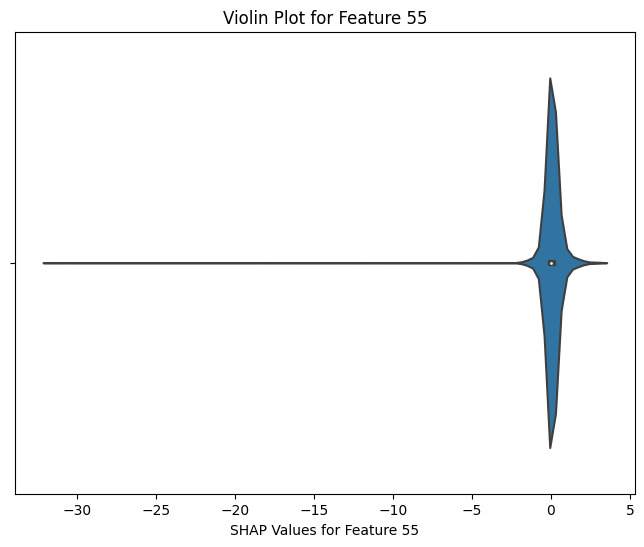

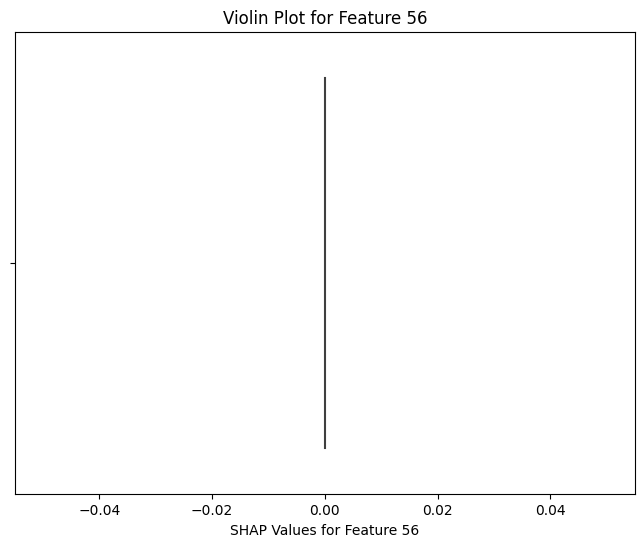

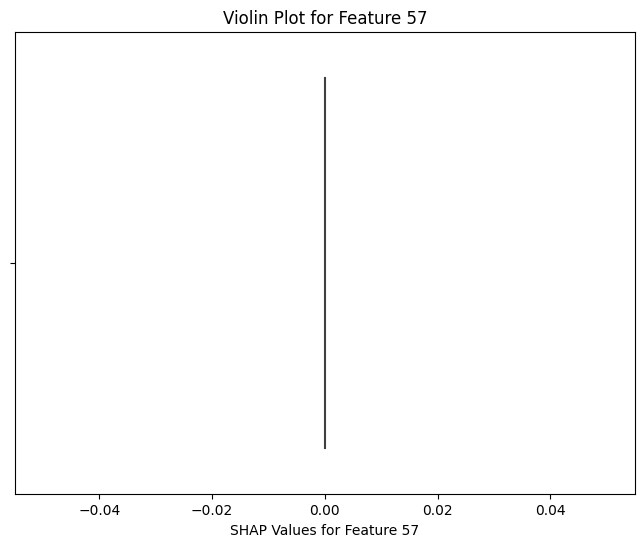

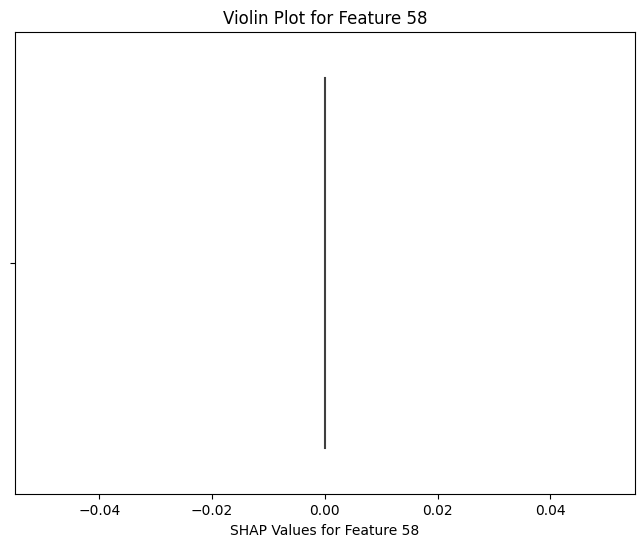

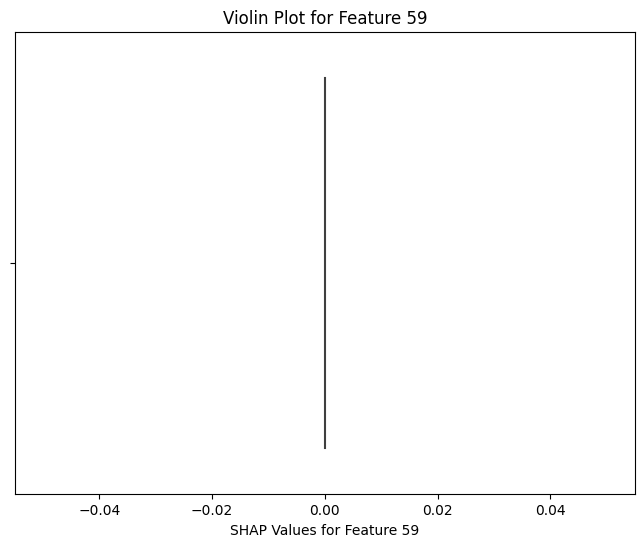

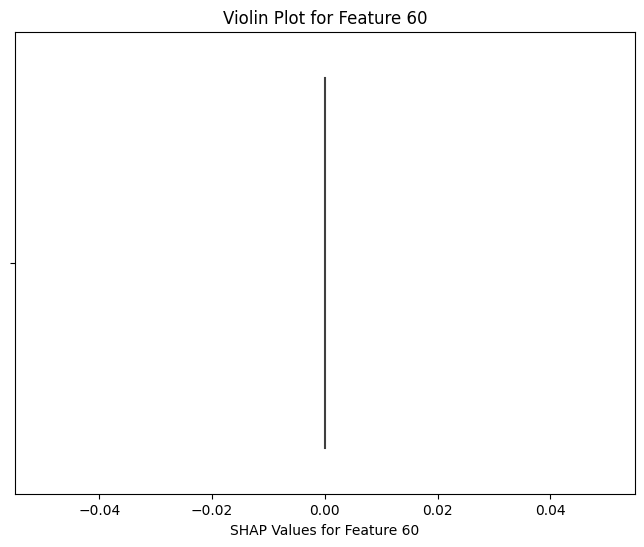

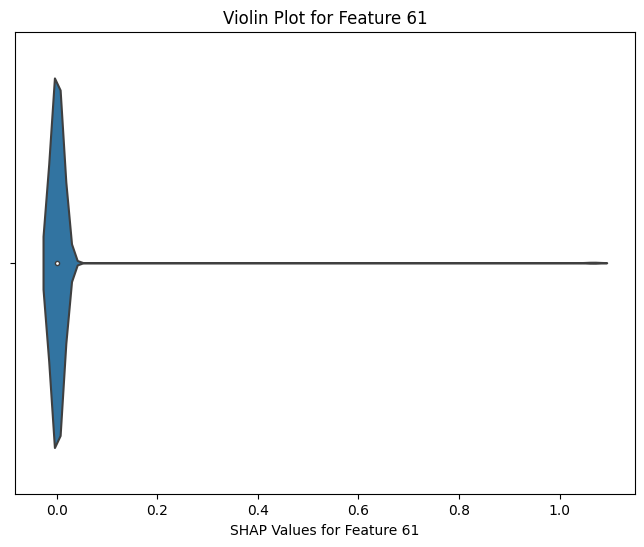

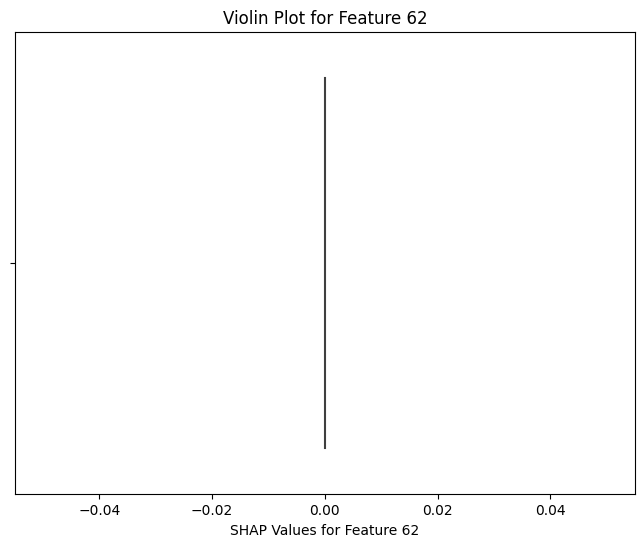

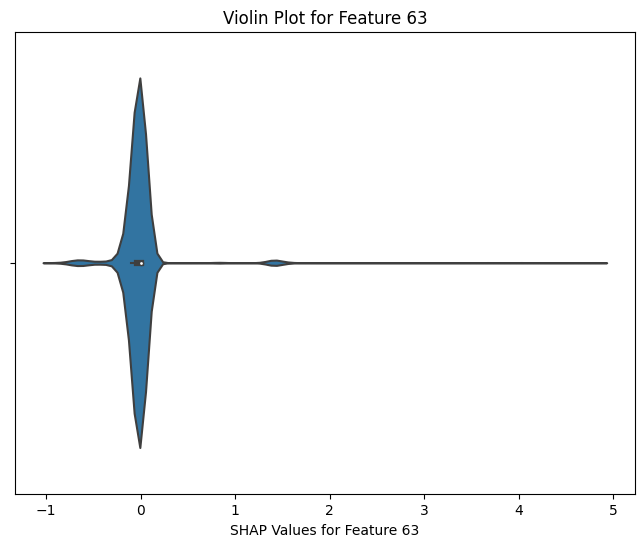

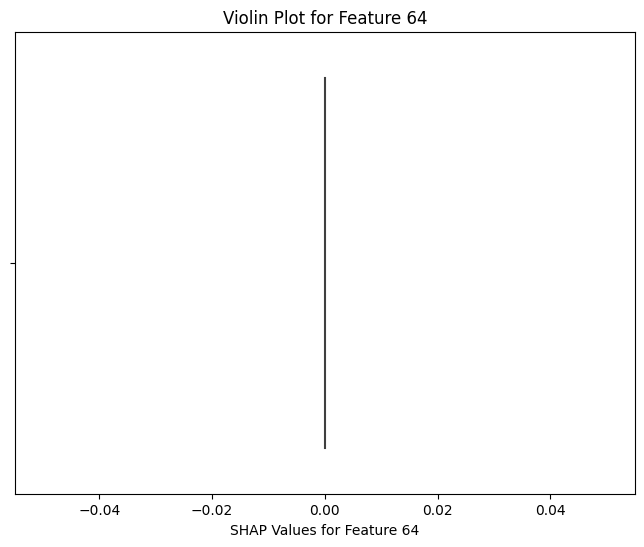

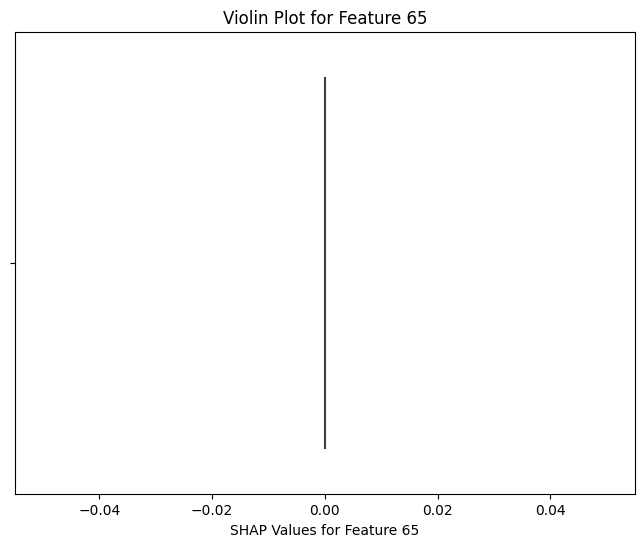

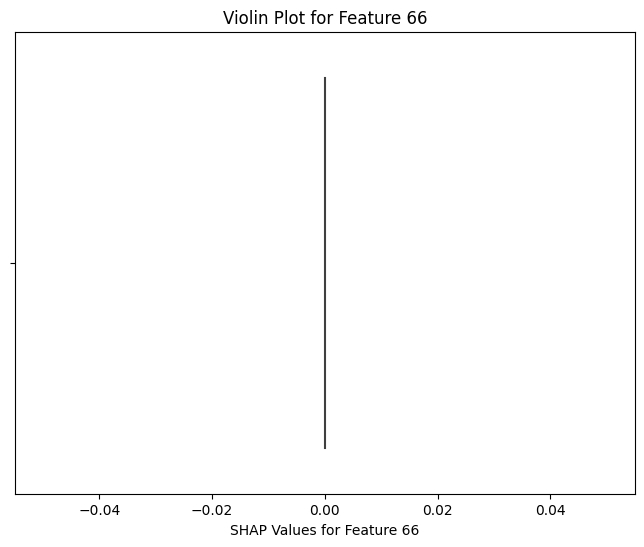

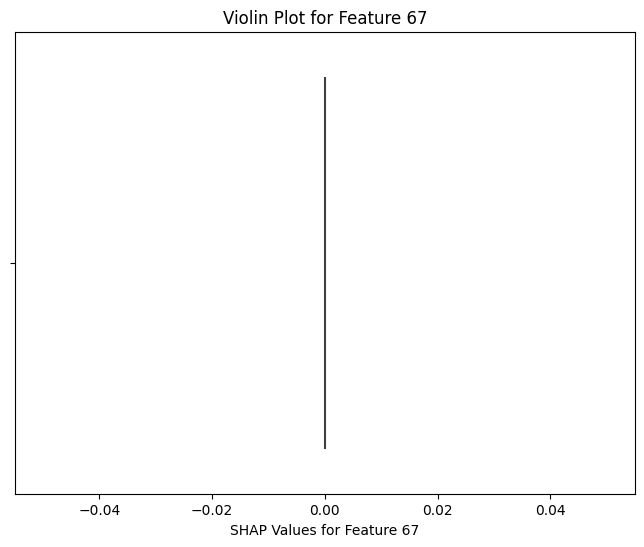

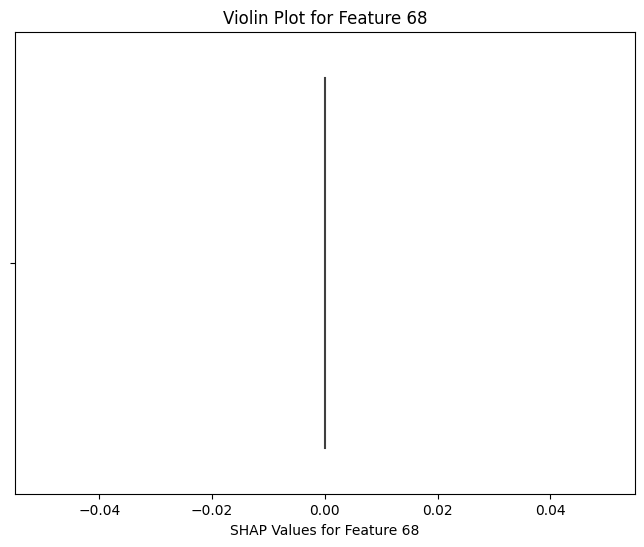

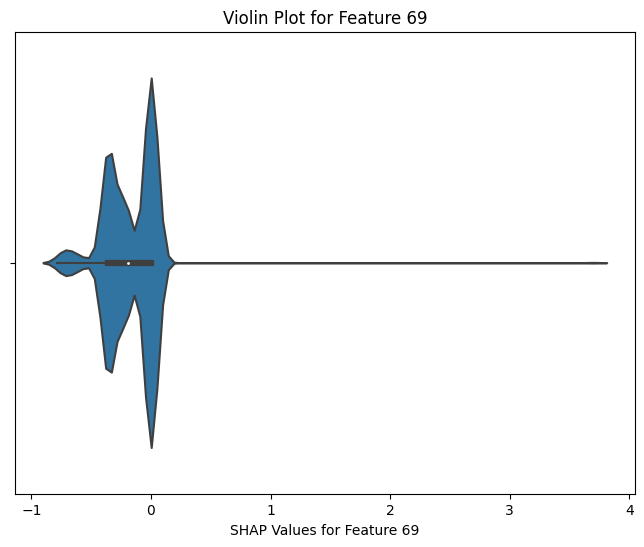

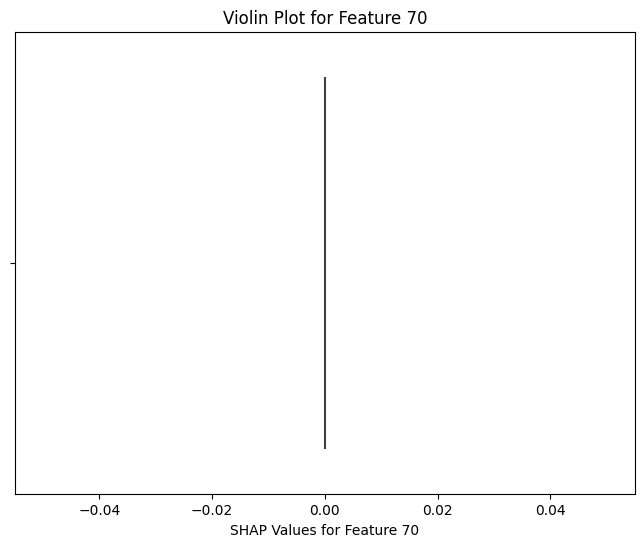

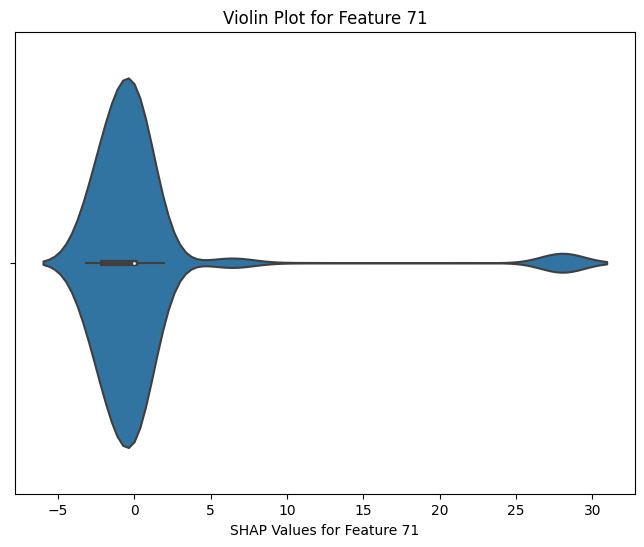

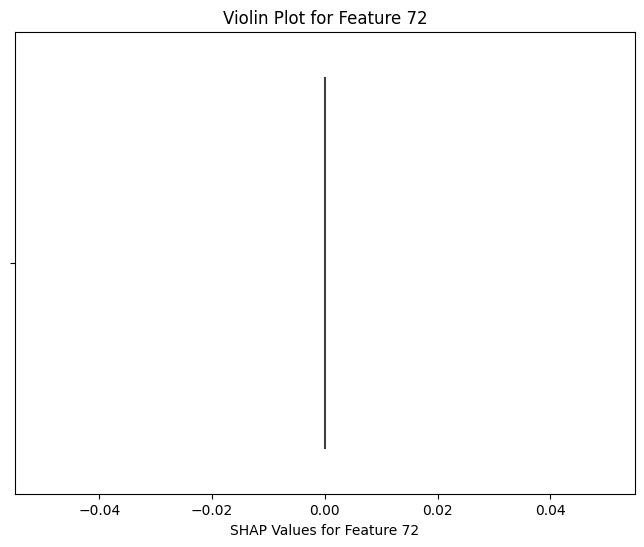

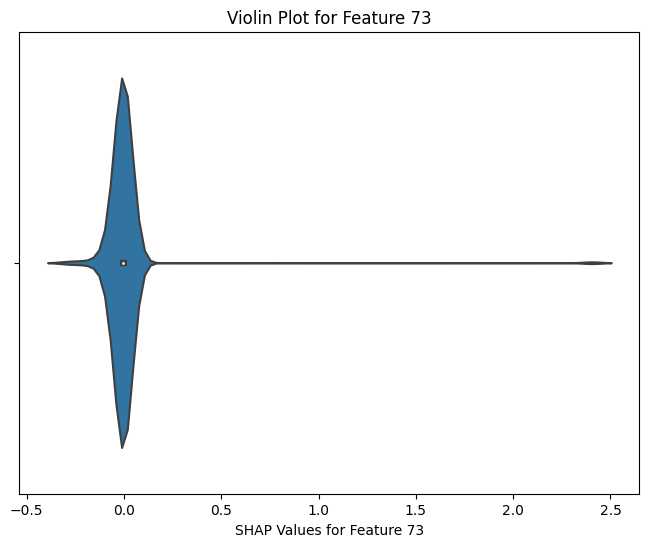

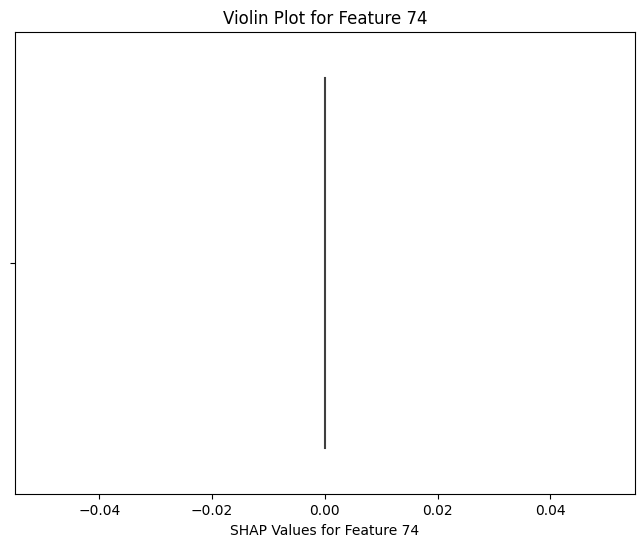

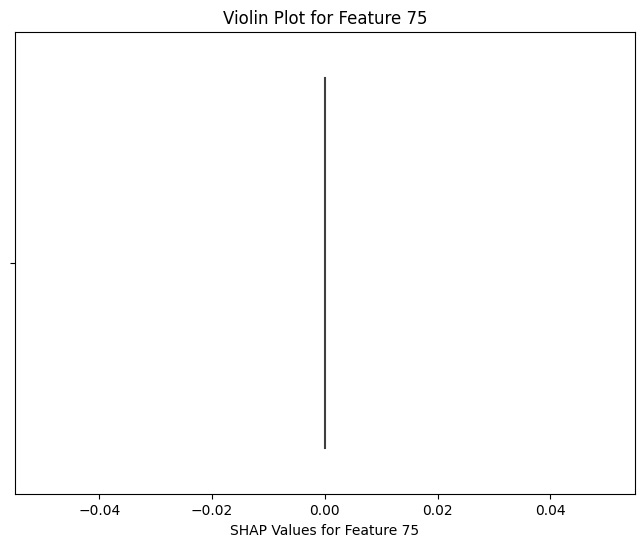

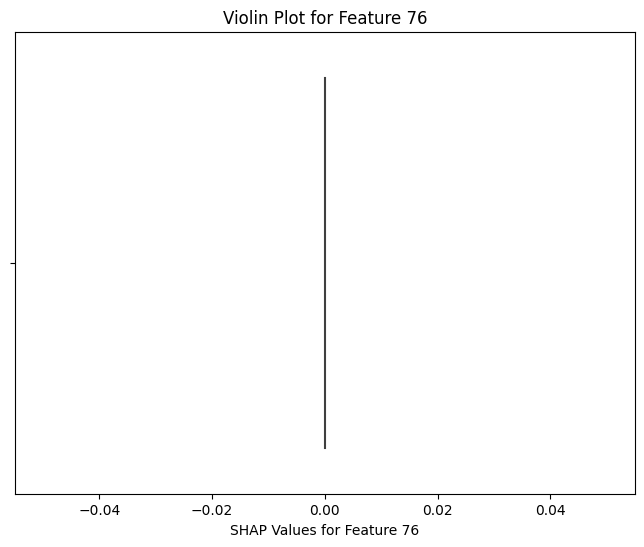

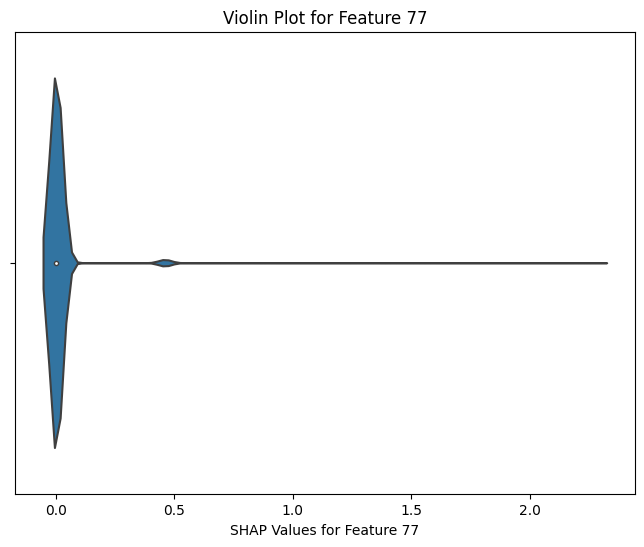

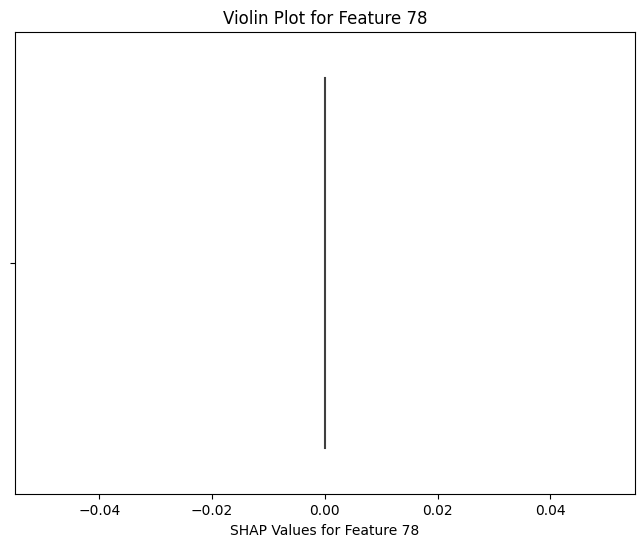

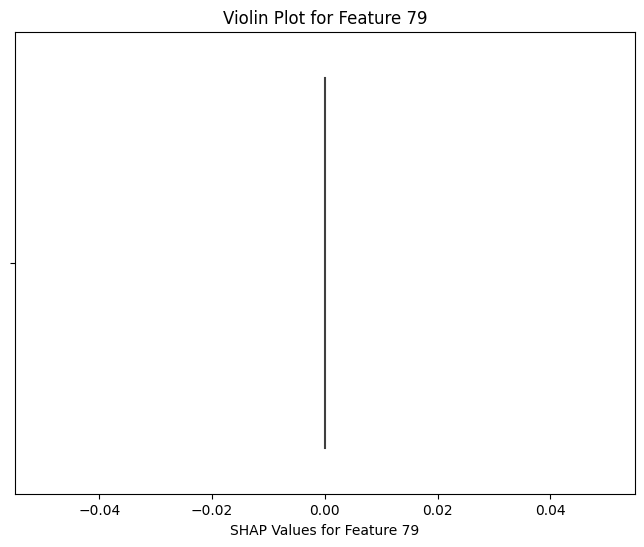

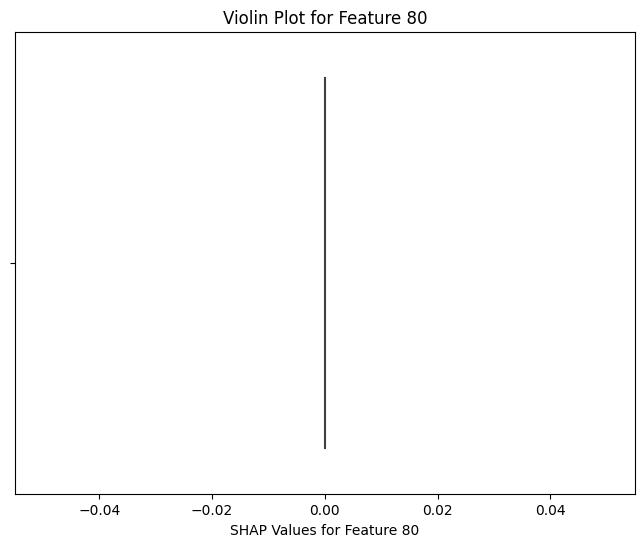

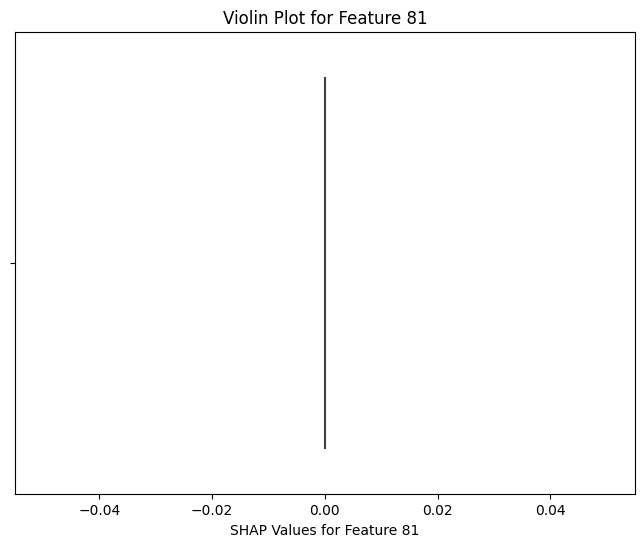

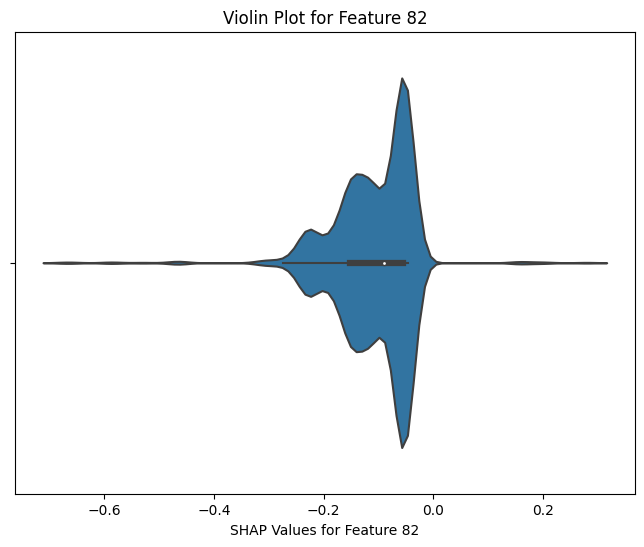

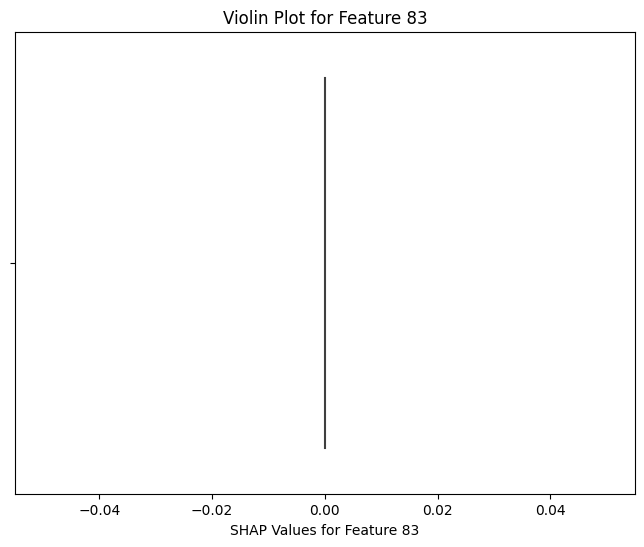

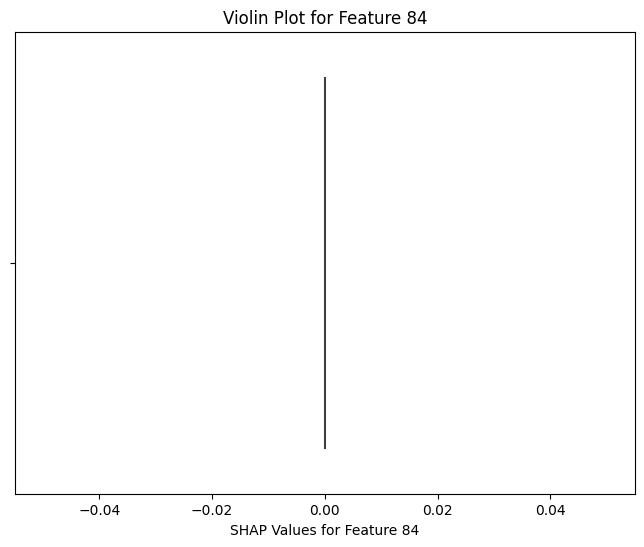

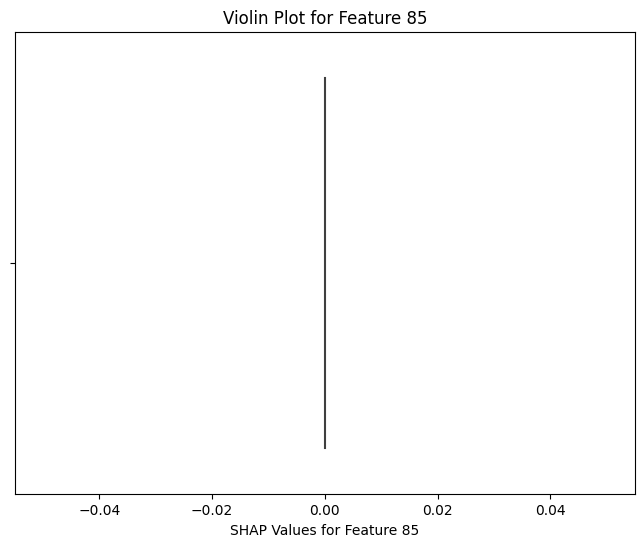

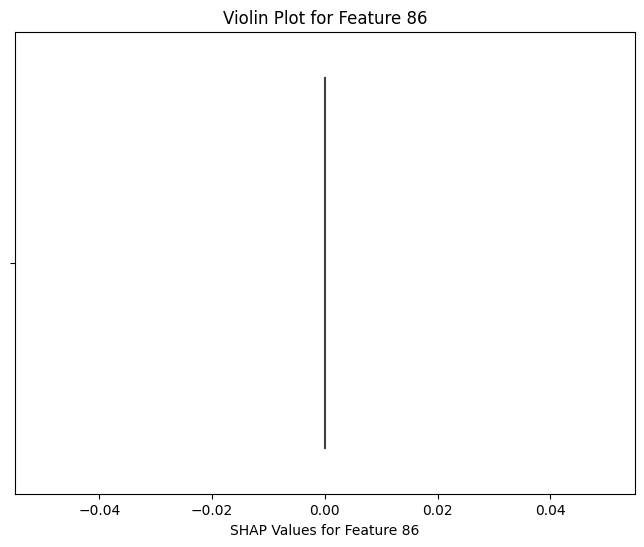

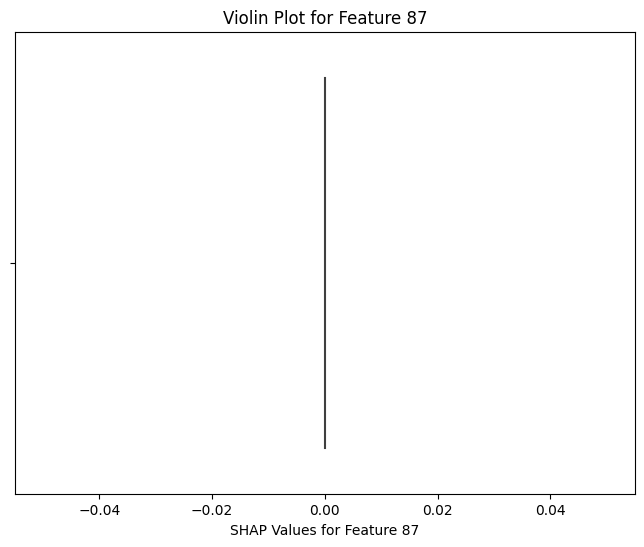

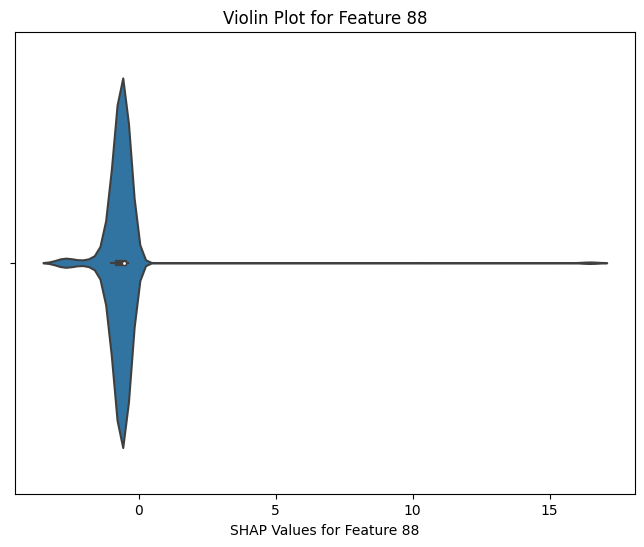

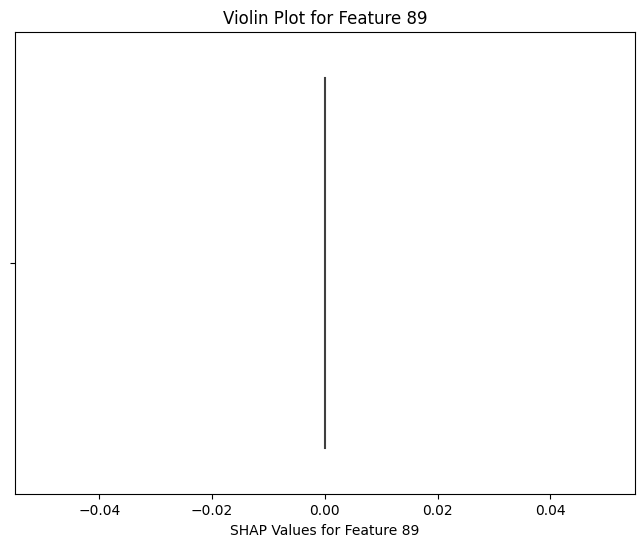

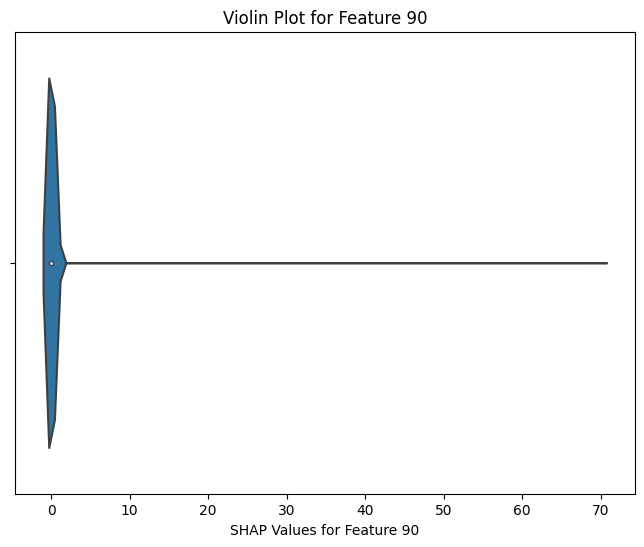

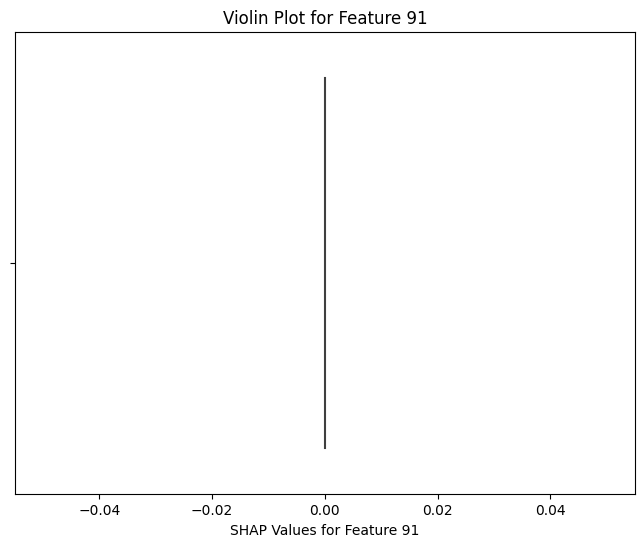

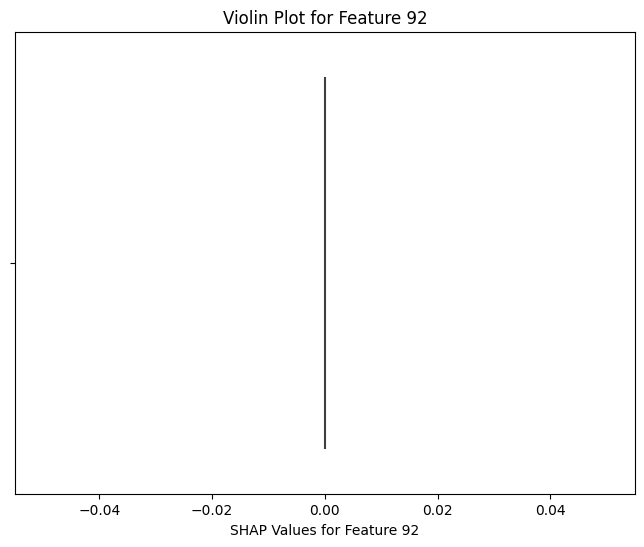

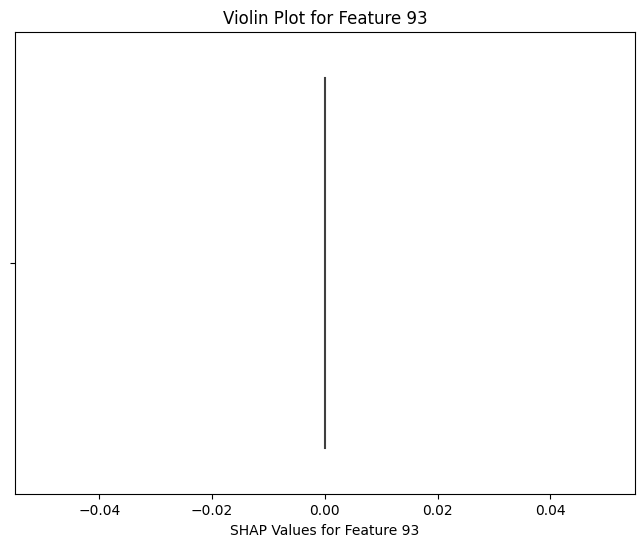

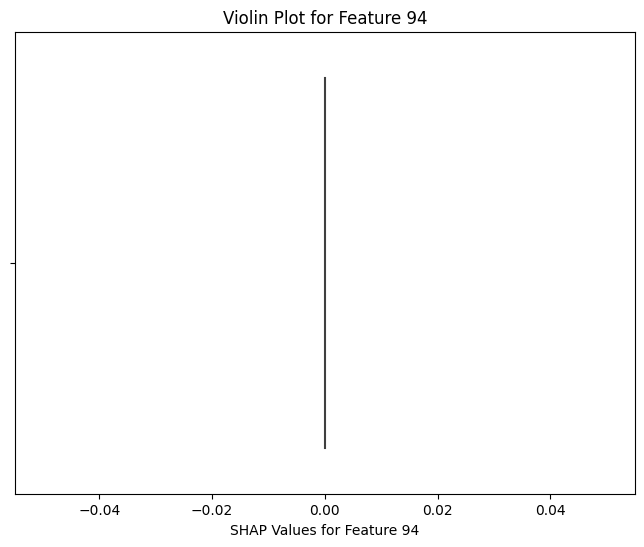

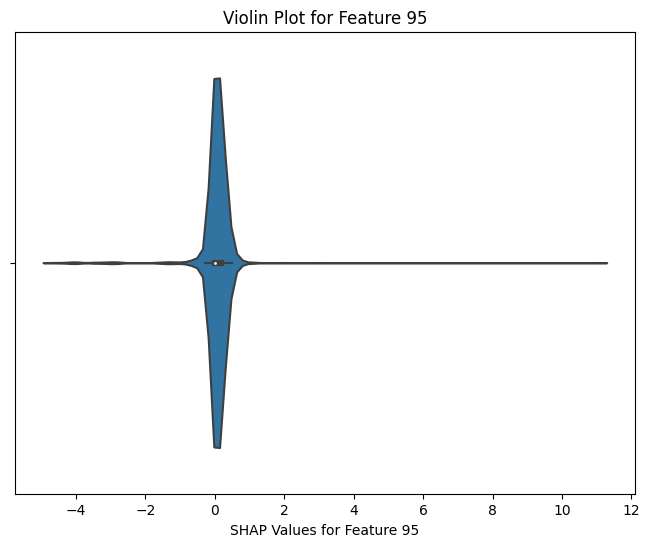

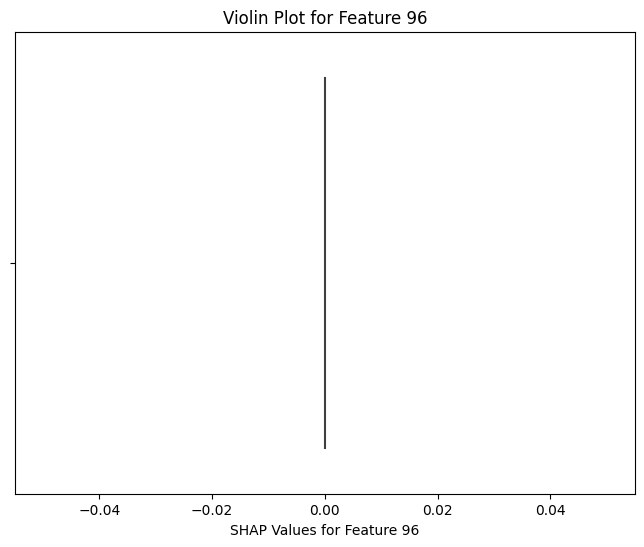

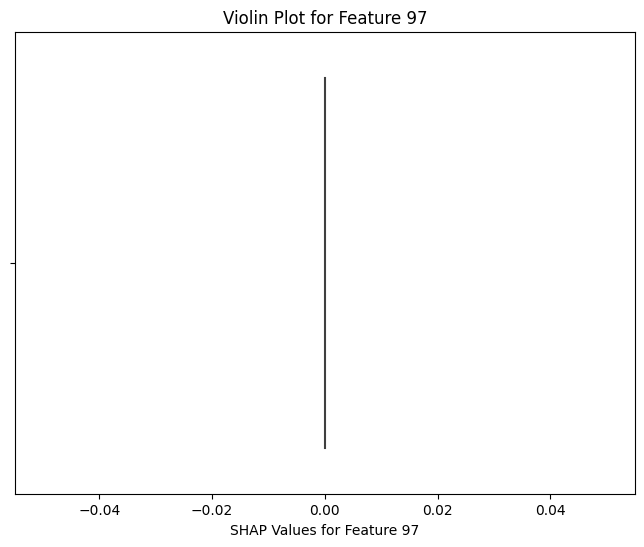

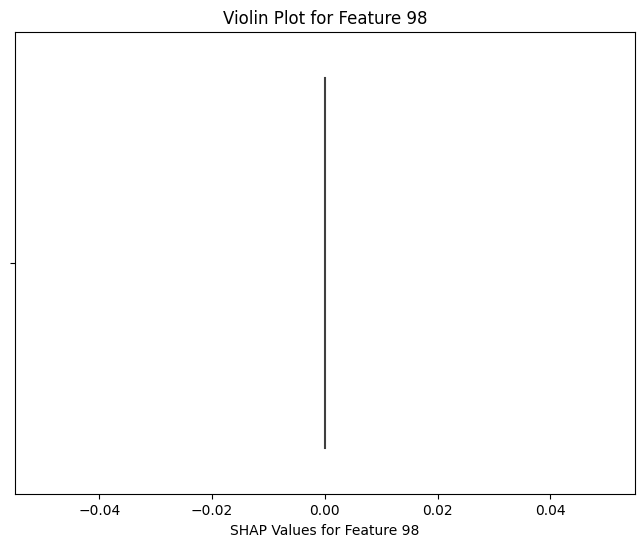

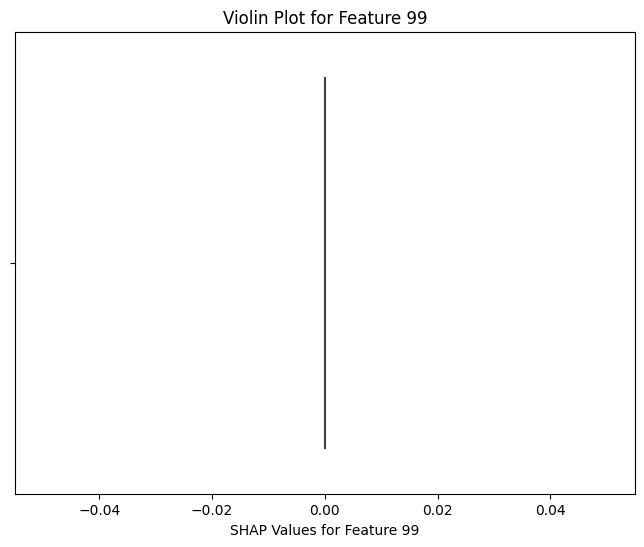

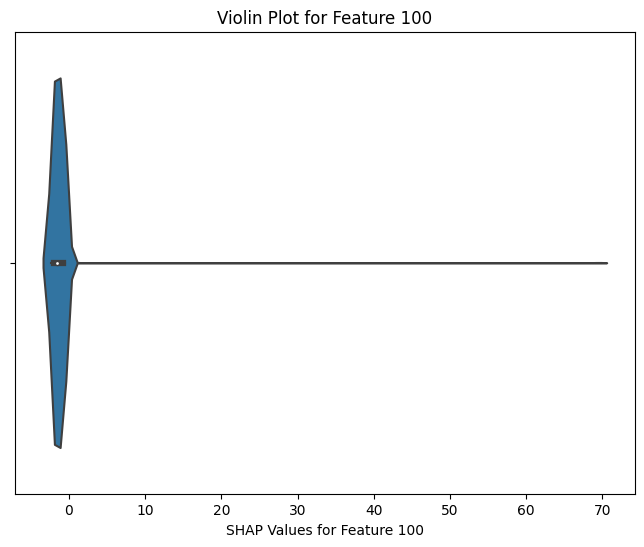

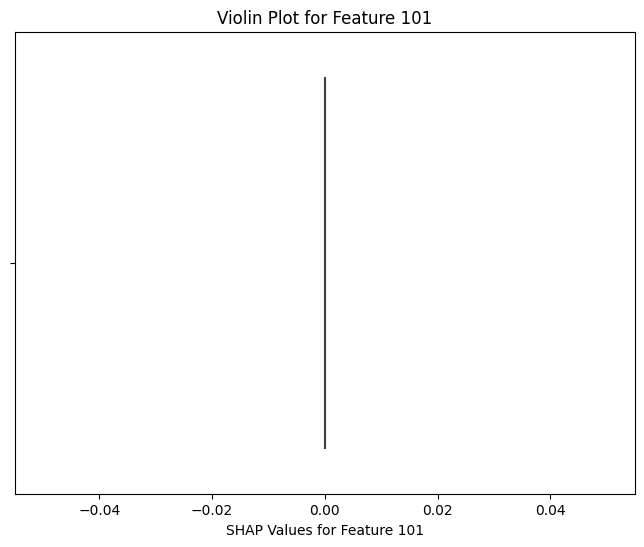

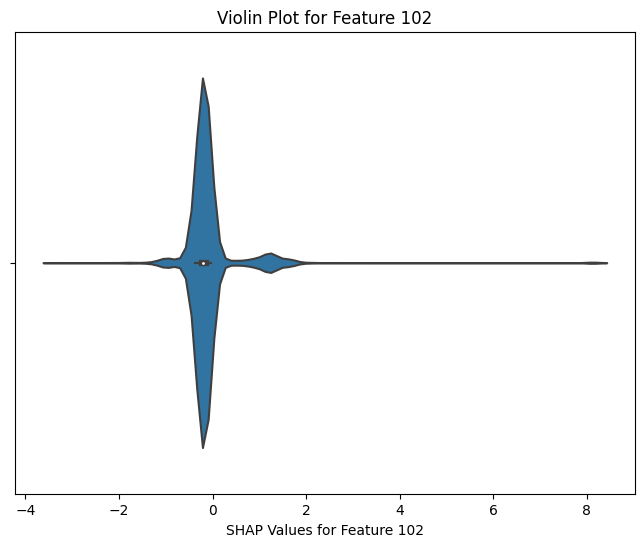

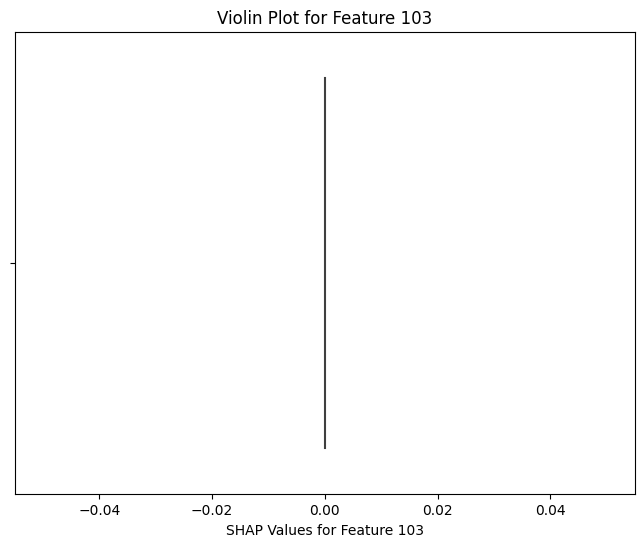

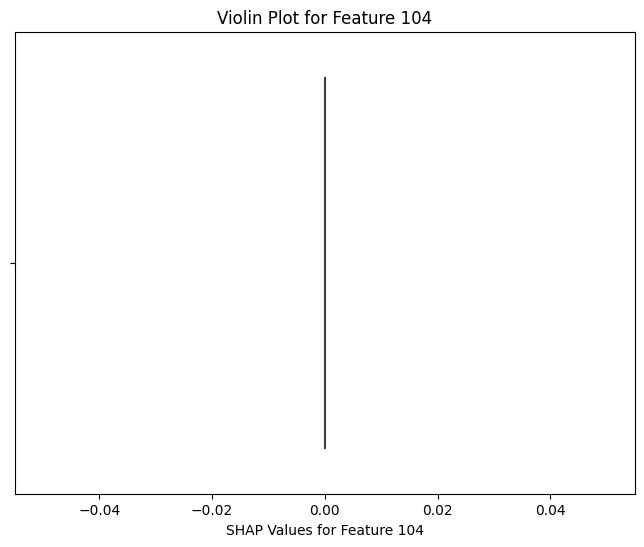

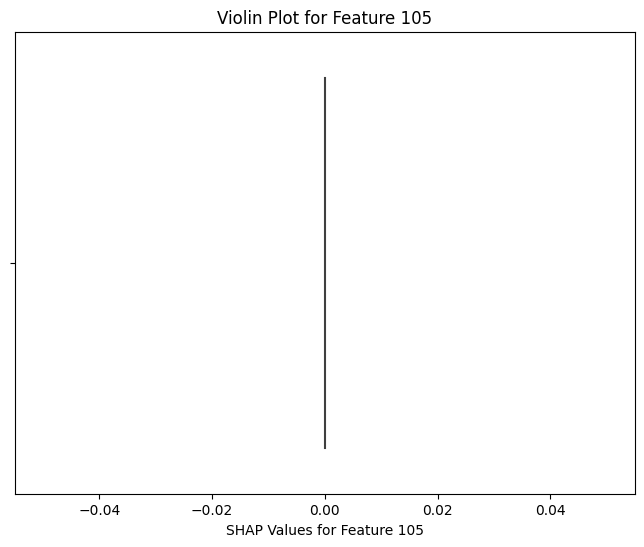

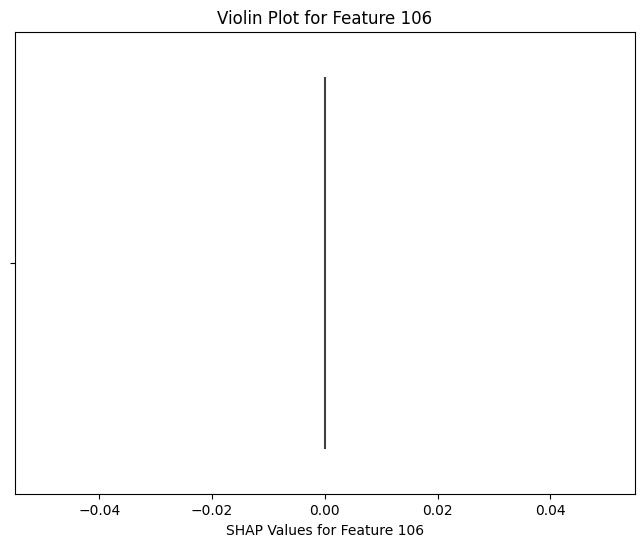

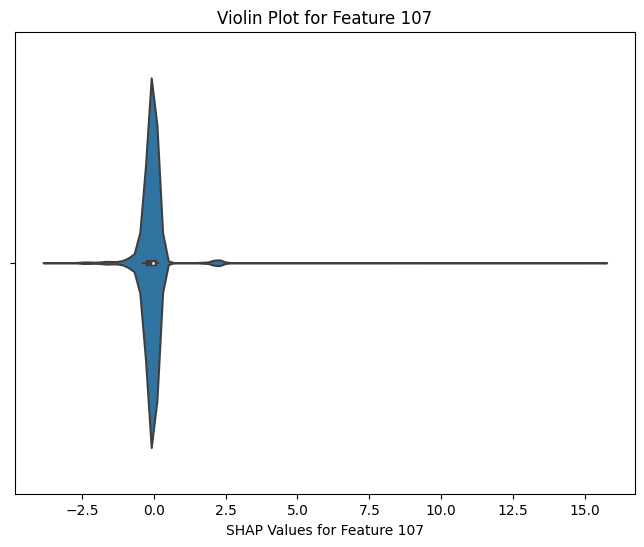

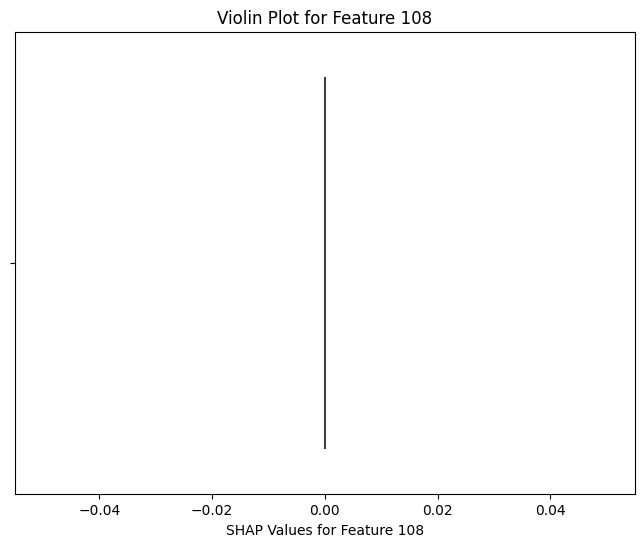

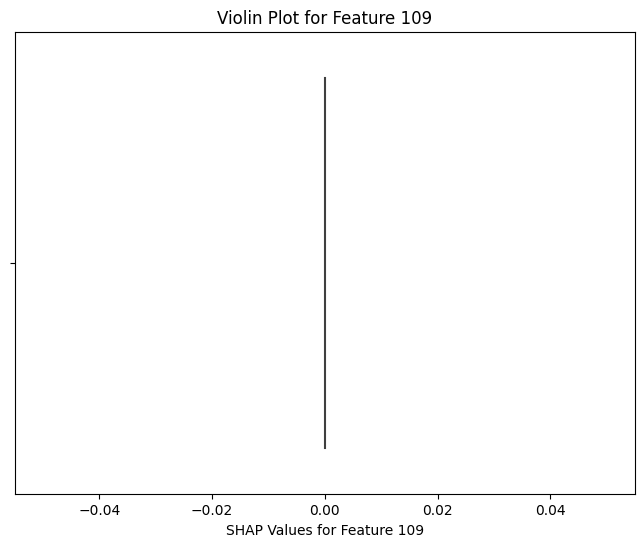

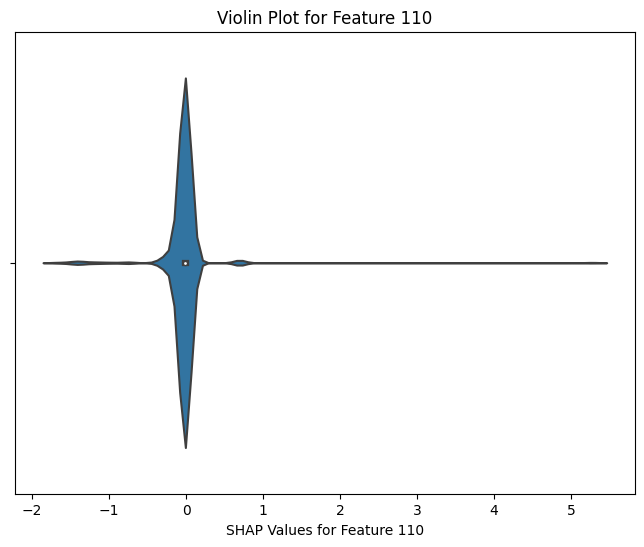

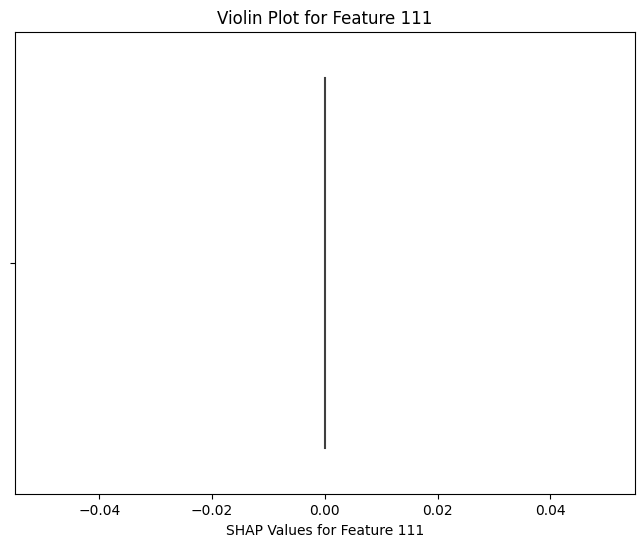

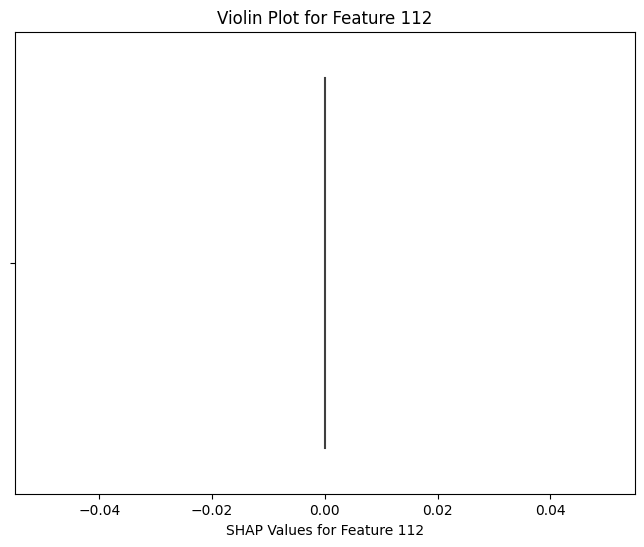

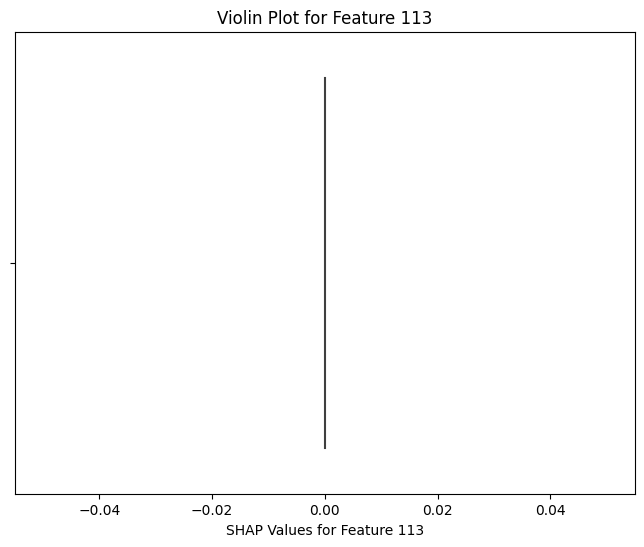

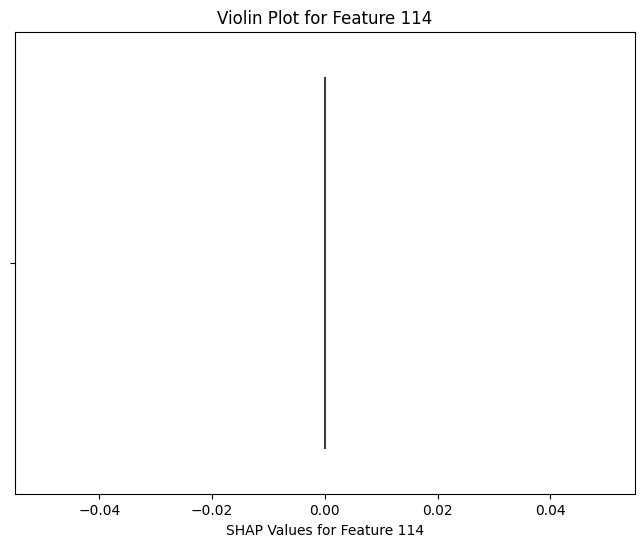

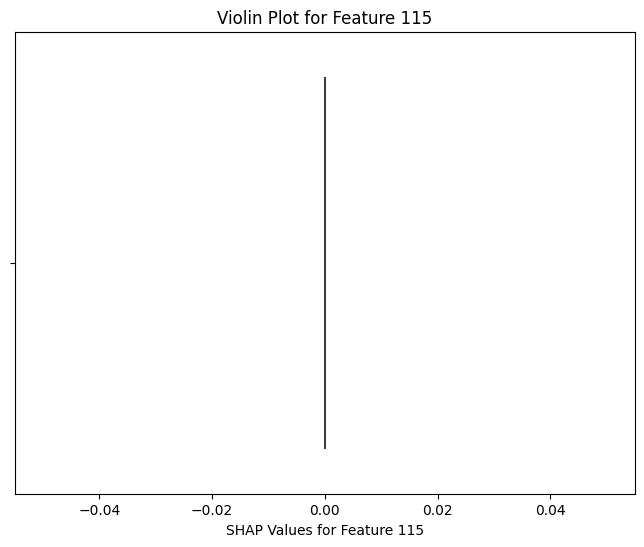

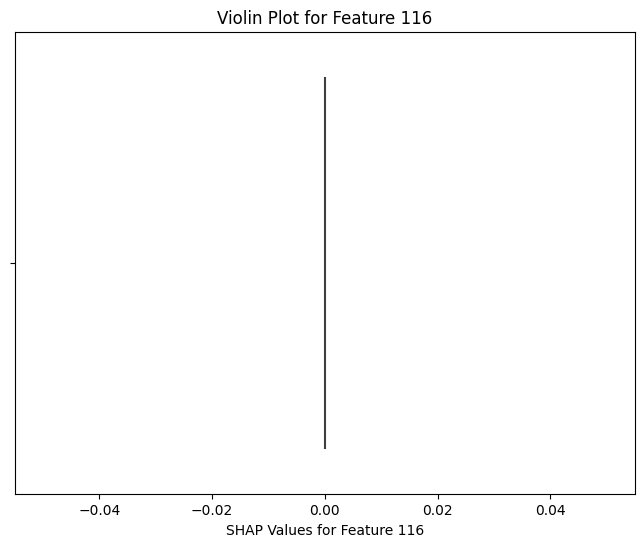

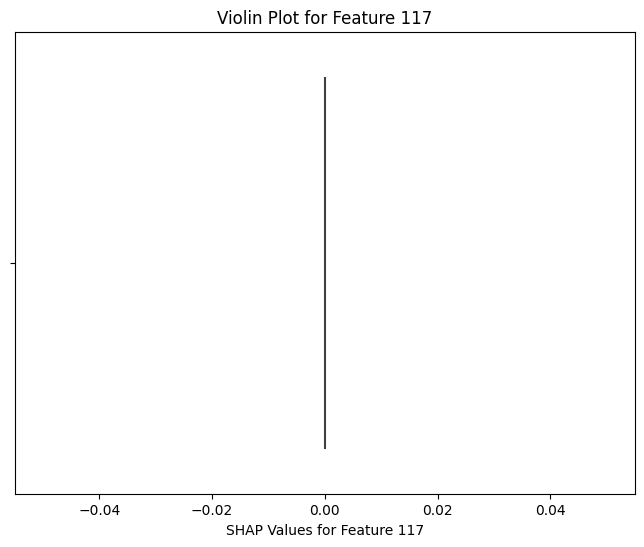

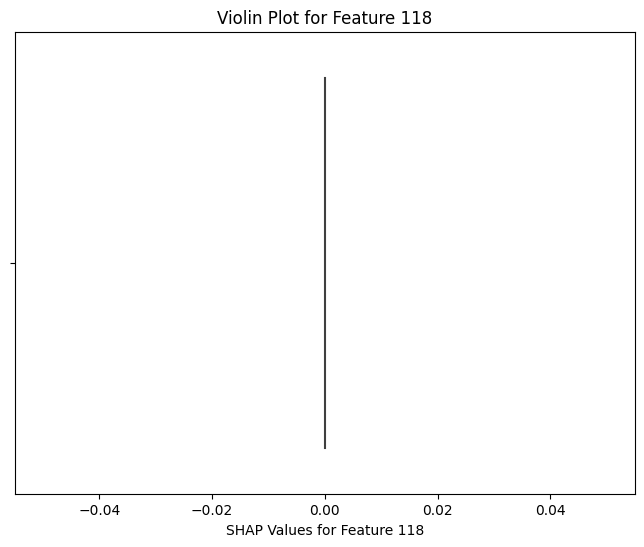

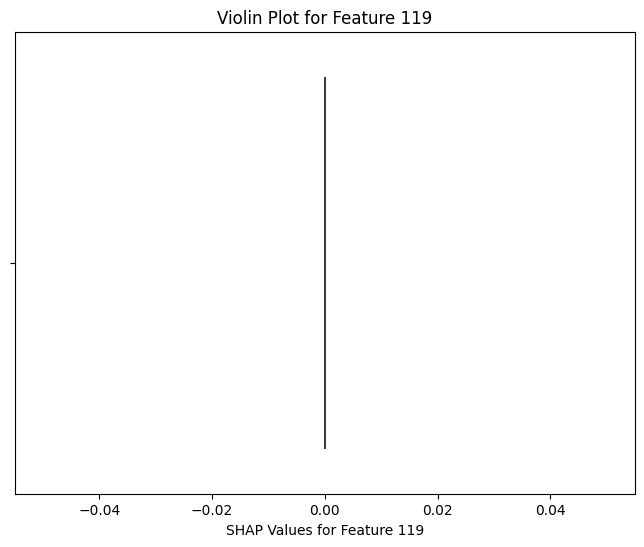

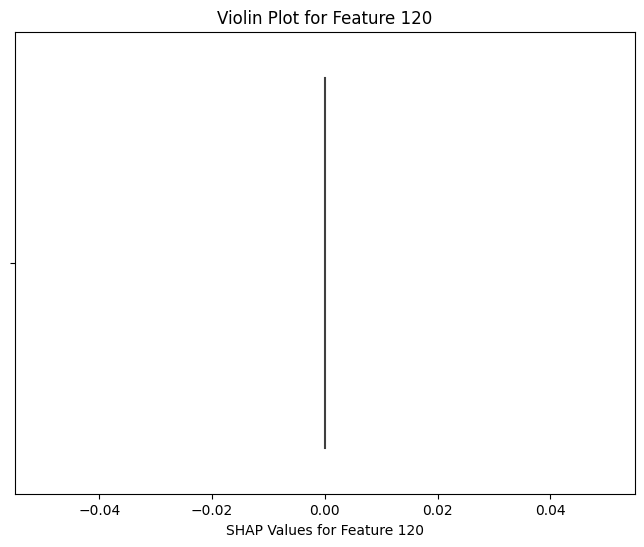

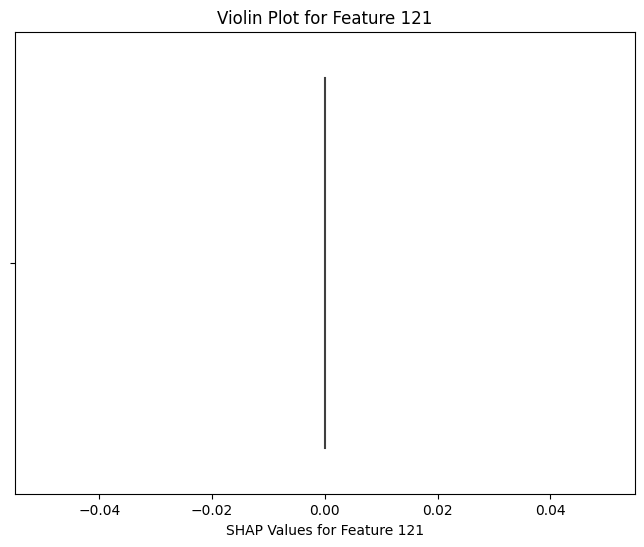

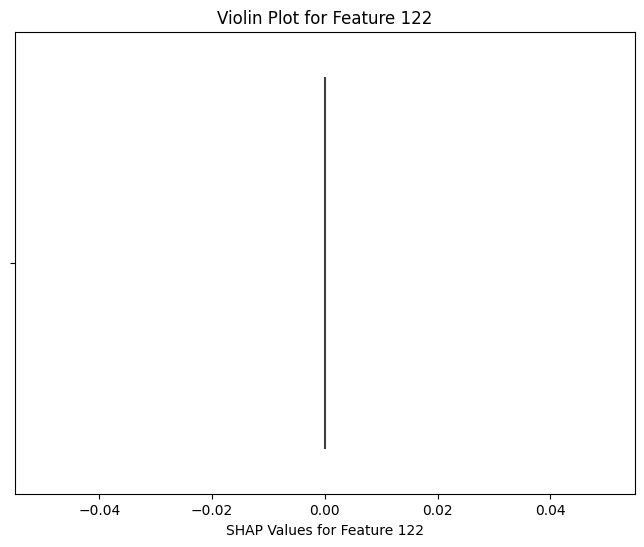

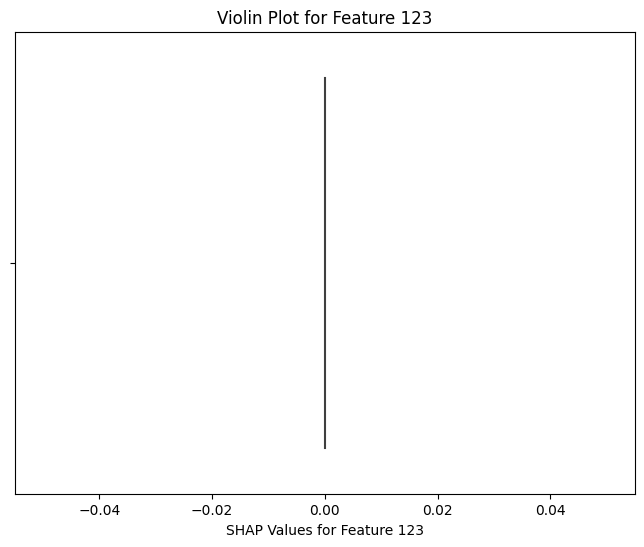

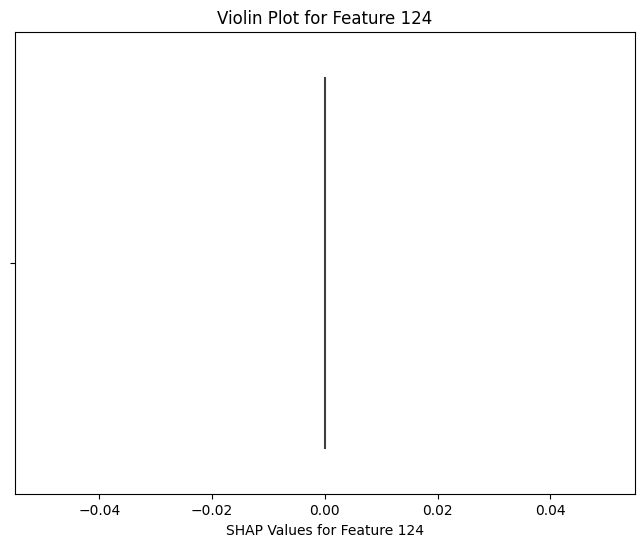

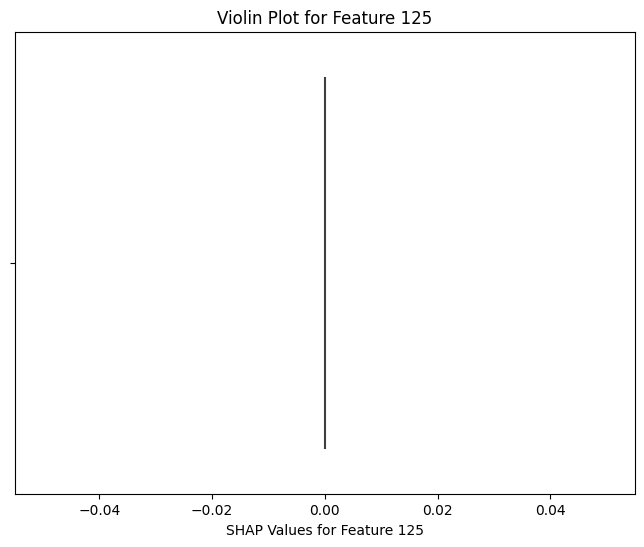

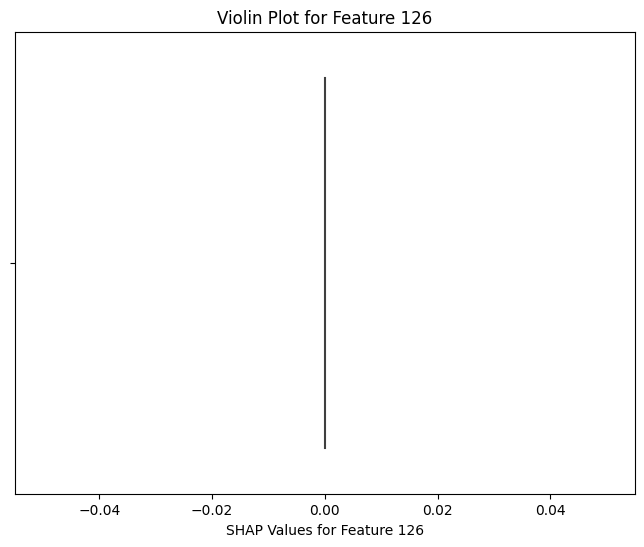

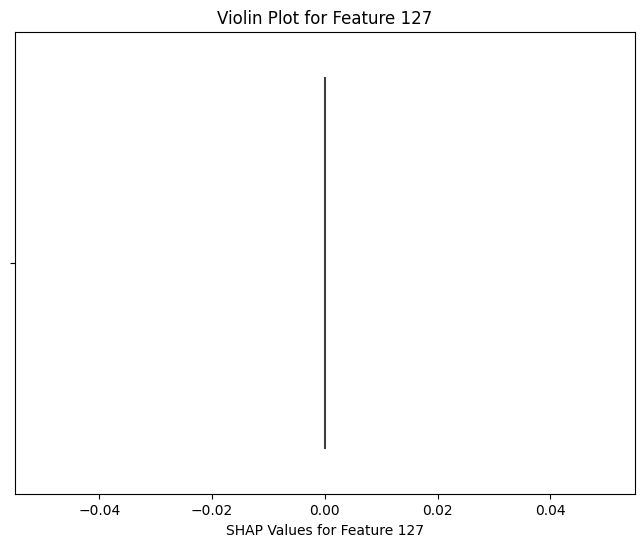

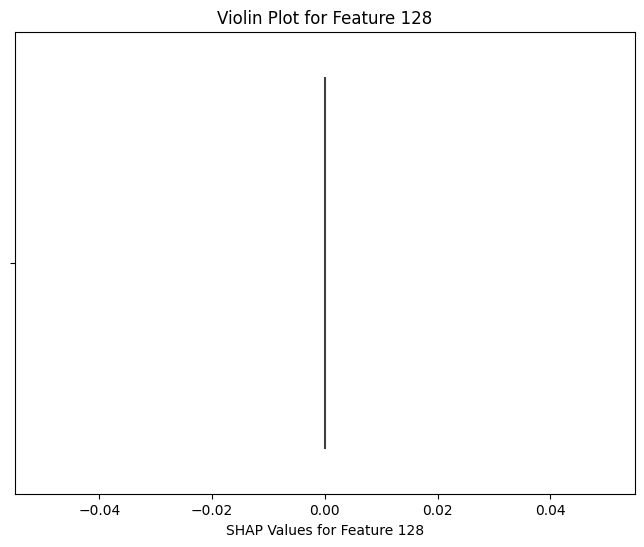

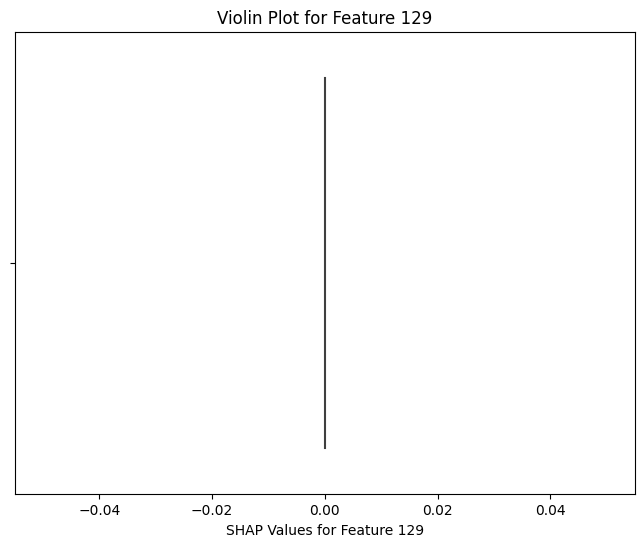

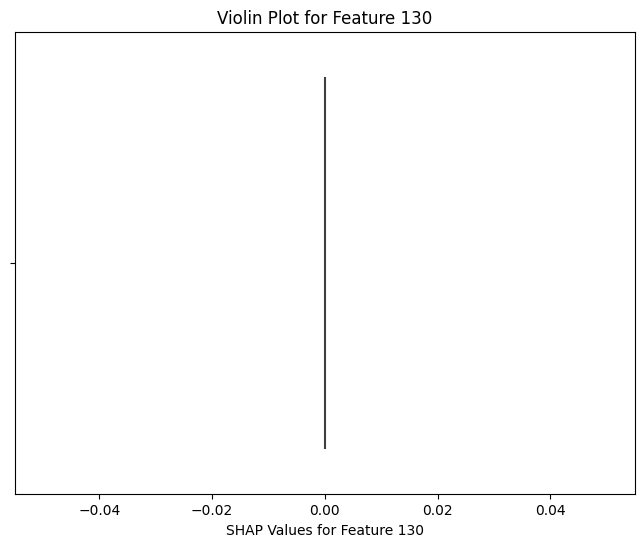

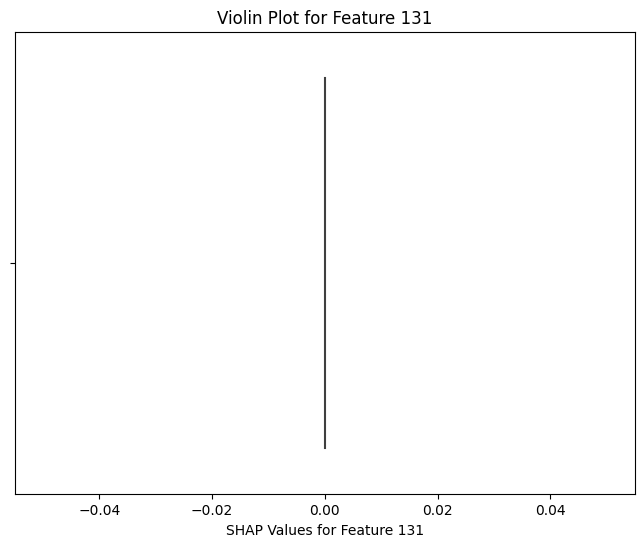

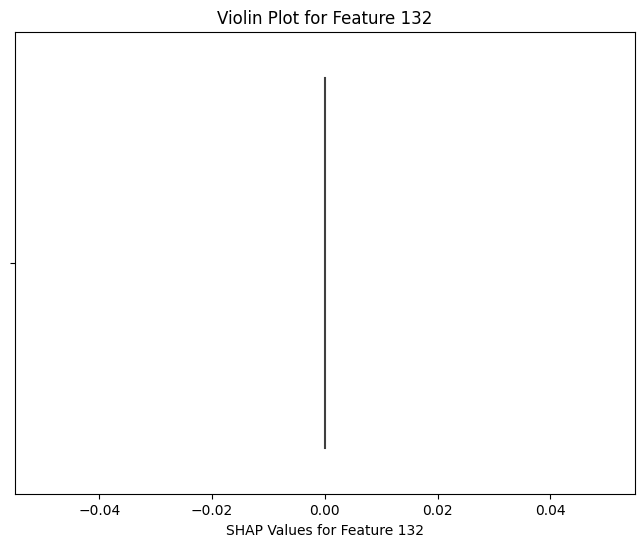

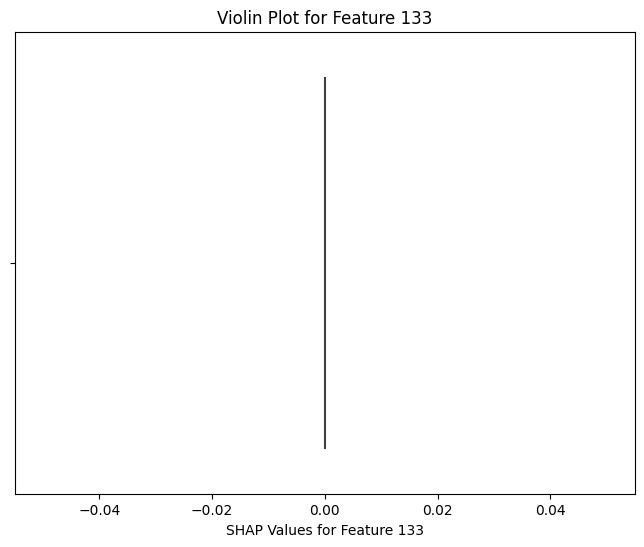

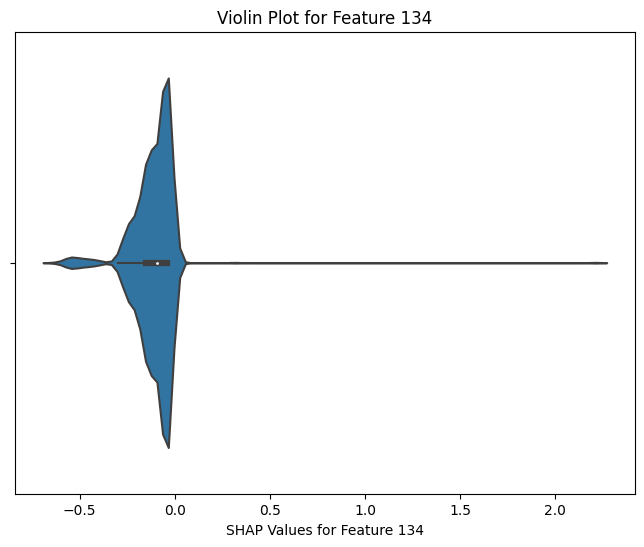

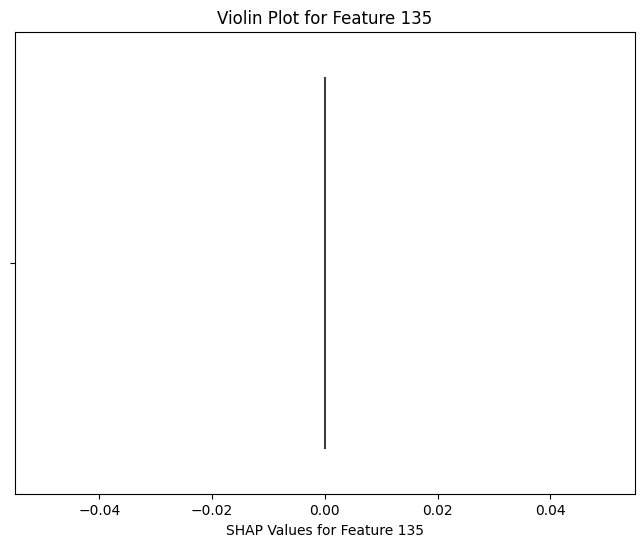

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('soil_data (1).csv')

# Define features (independent variables) and target (dependent variable)
X = df.drop(columns=['score'])
y = df['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Identify numeric columns for imputation
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns for one-hot encoding
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Impute missing values for numeric columns using the mean
imputer = SimpleImputer(strategy='mean')
X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Create feature names for one-hot encoded columns
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Combine encoded categorical columns with numeric columns
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names)

X_train = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded_df], axis=1)
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align target variable

# Train a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.Explainer(regressor, X_train)
shap_values = explainer.shap_values(X_test)

# Create violin plots for all features
for feature_index in range(shap_values.shape[1]):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=shap_values[:, feature_index])
    plt.title(f'Violin Plot for Feature {feature_index}')
    plt.xlabel(f'SHAP Values for Feature {feature_index}')
    plt.show()


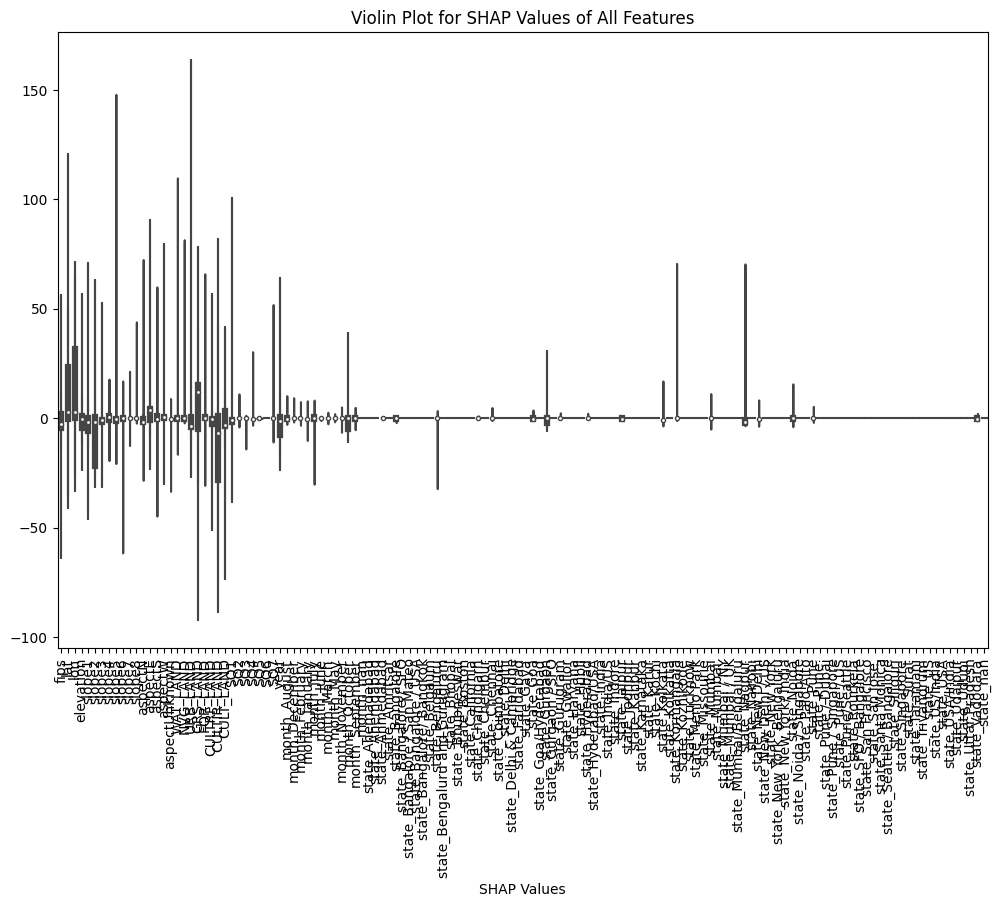

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('soil_data (1).csv')

# Define features (independent variables) and target (dependent variable)
X = df.drop(columns=['score'])
y = df['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Identify numeric columns for imputation
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns for one-hot encoding
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Impute missing values for numeric columns using the mean
imputer = SimpleImputer(strategy='mean')
X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Create feature names for one-hot encoded columns
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Combine encoded categorical columns with numeric columns
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names)

X_train = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded_df], axis=1)
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align target variable

# Train a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.Explainer(regressor, X_train)
shap_values = explainer.shap_values(X_test)

# Create a single violin plot for all features
plt.figure(figsize=(12, 8))
sns.violinplot(data=shap_values)
plt.title('Violin Plot for SHAP Values of All Features')
plt.xlabel('SHAP Values')
plt.xticks(ticks=range(shap_values.shape[1]), labels=X_test.columns, rotation=90)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import shap
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('soil_data (1).csv')

# Define features (independent variables) and target (dependent variable)
X = df.drop(columns=['score'])
y = df['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Identify numeric columns for imputation
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns for one-hot encoding
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Impute missing values for numeric columns using the mean
imputer = SimpleImputer(strategy='mean')
X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Create feature names for one-hot encoded columns
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Combine encoded categorical columns with numeric columns
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names)

X_train = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded_df], axis=1)
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align target variable

# Train a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.Explainer(regressor, X_train)
shap_values = explainer.shap_values(X_test)

# Specify the two features for which you want to create an interaction plot
feature1_name = 'year'  # Change this to the first feature's name
feature2_name = 'slope1'  # Change this to the second feature's name

# Create an Interaction Plot for the specified features
shap.interaction_plot(feature1_name, feature2_name, shap_values, X_test, feature_names=list(X.columns) + list(encoded_feature_names))
plt.show()



AttributeError: ignored

In [ ]:
import seaborn as sns

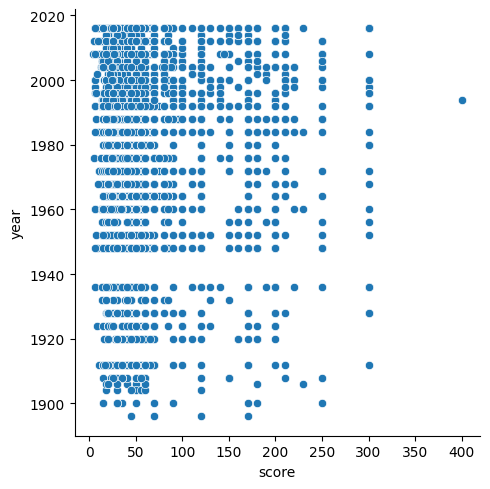

In [ ]:
sns.relplot(data=drought_df, x="score", y="year")

Text(0.5, 1.0, 'Scatter plot for Open vs Close ')

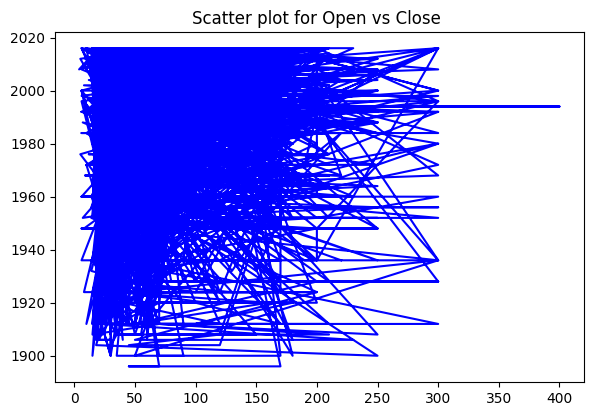

In [ ]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(drought_df['score'], drought_df['year'], color="blue")
plt.title('Scatter plot for Score vs Year ')

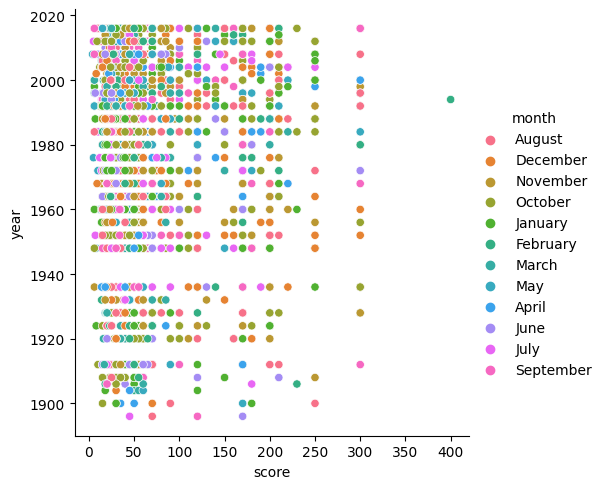

In [ ]:
sns.relplot(data=drought_df, x="score", y="year", hue="month")

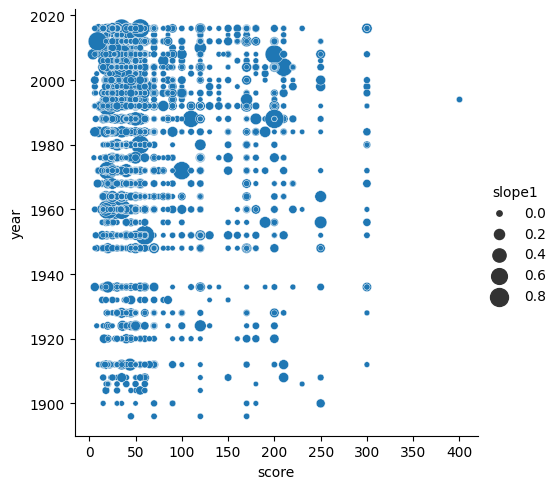

In [ ]:
sns.relplot(data=drought_df, x="score", y="year", size='slope1',
     sizes=(15, 200)
)

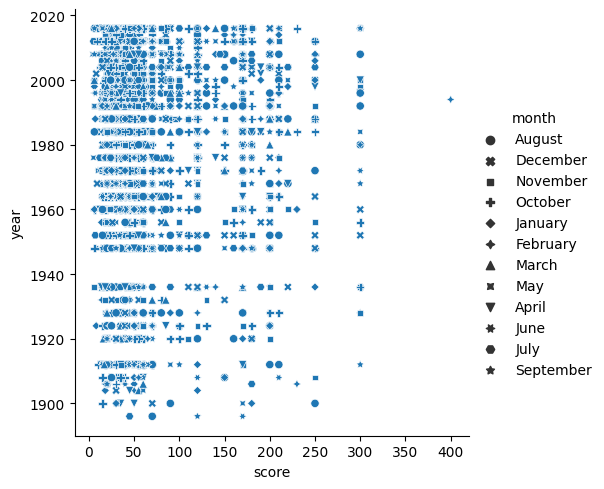

In [ ]:
sns.relplot(data=drought_df, x="score", y="year", style="month")

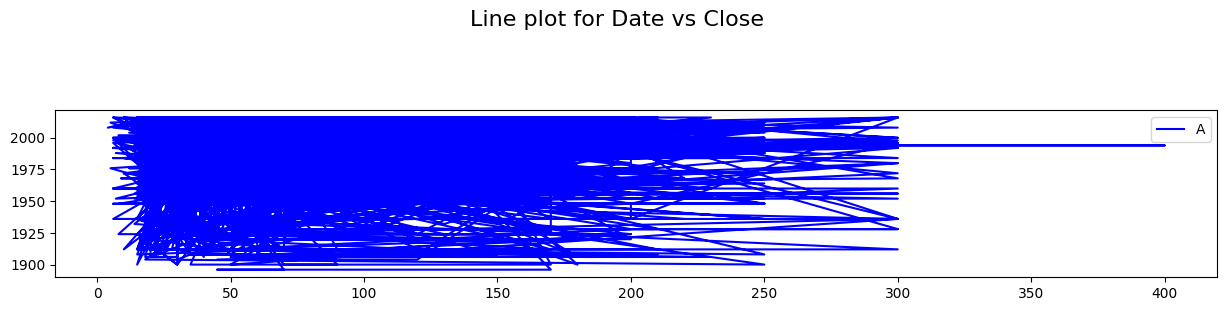

In [ ]:
fig = plt.figure(figsize = (15,10))
fig.suptitle("Line plot for Date vs Close", fontsize=16)


plt.subplot(4, 1, 1)
plt.plot(drought_df['score'], drought_df['year'], color="blue")
plt.legend("A")


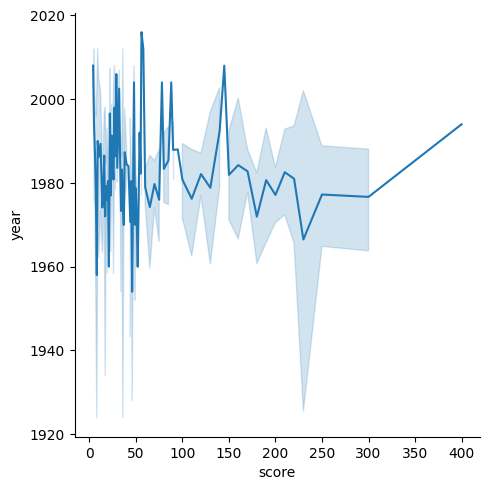

In [ ]:
sns.relplot(
    data=drought_df, x="score", y="year",kind="line"
)

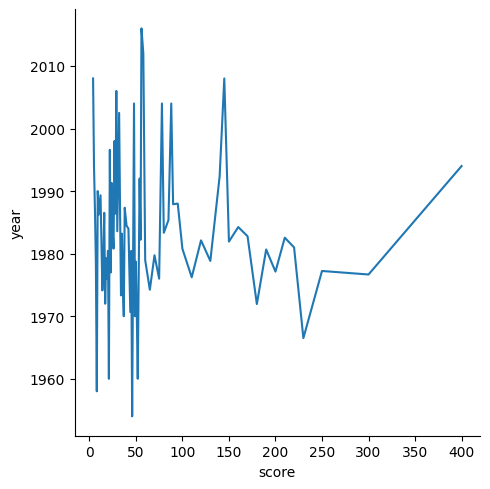

In [ ]:
sns.relplot(
    data=drought_df, x="score", y="year",kind="line",errorbar=None
)

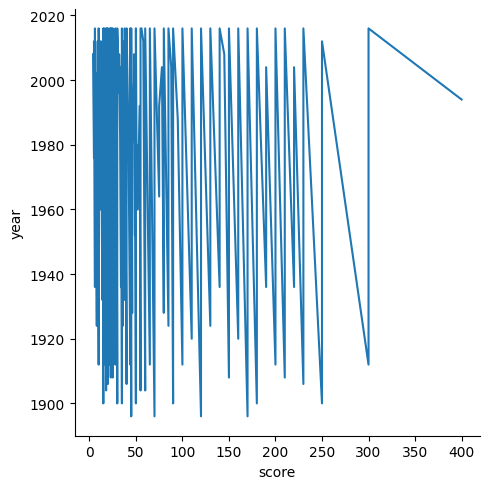

In [ ]:
sns.relplot(
   data=drought_df, x="score", y="year",kind="line",
    estimator=None,
)

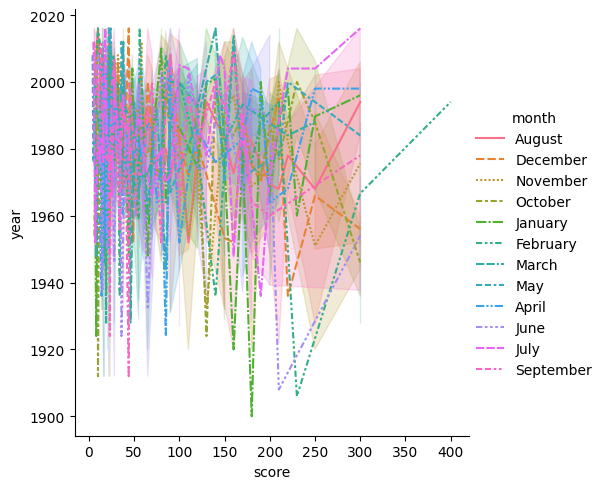

In [ ]:
# Create the relational line plot using Seaborn
sns.relplot(
    data=drought_df, kind="line",
    x="score", y="year",
    hue="month", style="month"
)

# Display the plot
plt.show()

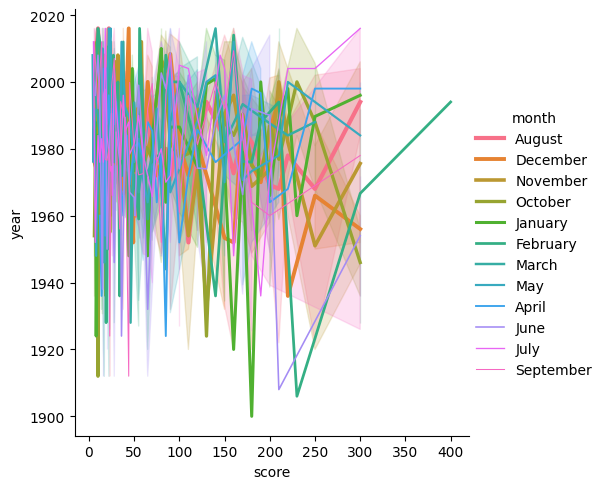

In [ ]:
sns.relplot(
    data=drought_df, kind="line",
    x="score", y="year",
    hue="month", size="month"
)